In [1]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

from sklearn.metrics import accuracy_score

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

#### load dataset

In [ ]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("num features: ", len(app_X.columns))
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


,At1,At2,At3,At4,At5,At6,At7
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.398491,0.682104,0.415151,0.208745,0.169151,0.676349,0.375396
std,0.191452,0.207134,0.205799,0.199650,0.177329,0.218909,0.198132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244750,0.589000,0.277000,0.056000,0.049250,0.576000,0.238000
50%,0.413000,0.750000,0.442500,0.146000,0.113000,0.744000,0.397500
75%,0.505750,0.821000,0.545500,0.302500,0.226750,0.831250,0.486750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

Categorical columns:  []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8858333333333335
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8733333333333334
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing para

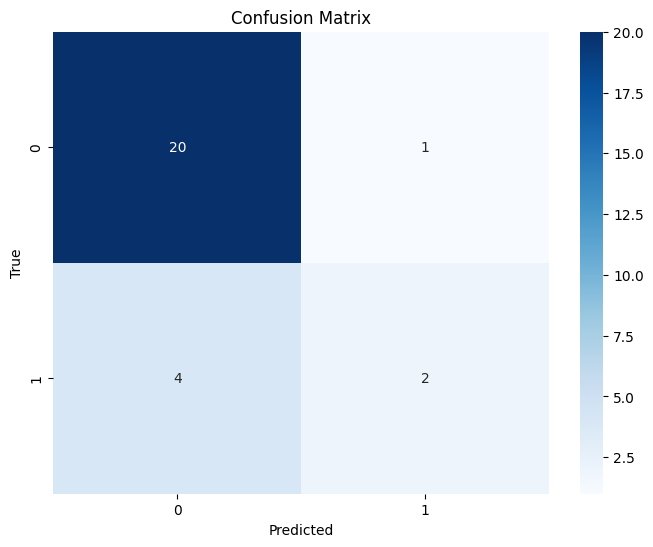

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
  Feature             Bin    Points
0     At1    [0.0, 0.204[  0.493471
1     At1  [0.204, 0.884[ -0.247410
2     At2  [0.411, 0.964[ -0.511021
3     At4    [0.056, 1.0[ -0.477992
4     At5  [0.033, 0.784[ -0.373326
5     At6    [0.0, 0.506[  0.719399
6     At6  [0.506, 0.956[ -0.656302
7     At7    [0.0, 0.145[  1.040754
8     At7  [0.145, 0.837[ -0.421646


In [4]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

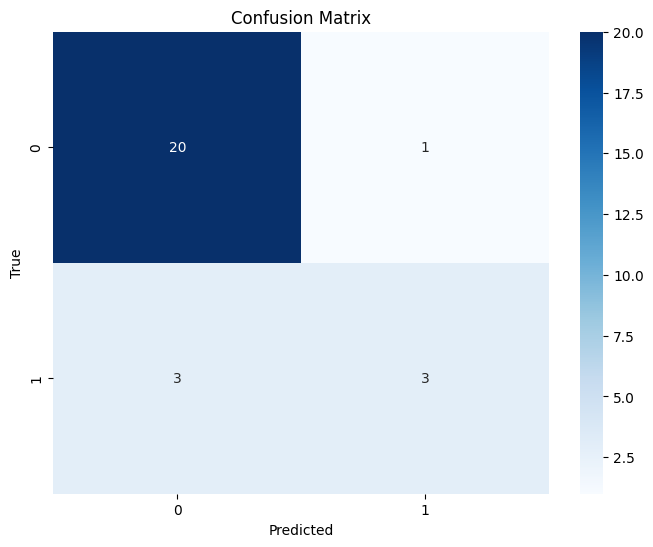

accuracy for class 0: 0.952
accuracy for class 1: 0.500

Evaluating the model on the train set...
accuracy on train set:  0.8860759493670886
precision on train set:  0.8799829964103533
recall on train set:  0.8860759493670886
f1 score on train set:  0.8810513093052467
balanced accuracy on train set:  0.7765625
logistic loss on train set:  0.6498690864159518
mse on train set:  0.11392405063291139

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.149457
1      At1  [0.204, 0.884[ -0.005333
2      At1    [0.884, inf[ -0.144124
3      At2    [0.0, 0.411[  0.209746
4      At2  [0.411, 0.964[ -0.182396
5      At2    [0.964, inf[ -0.027350
6      At3    [0.0, 0.153[  0.150040
7      At3  [0.153, 0.927[ -0.005916
8      At3    [0.927, inf[ -0.144124
9      At4    [0.0, 0.056[ -0.196631
10     At4    [0.056, 1.0[  0.196631
11     At5    [0.0, 0.033[  0.313753
12     At5  [0.033, 0.784[ -0.234388
13     At5    [0.784, inf[ -0.079365
14     At6    [0.0, 0.506[  

In [5]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 2.162818193435669 seconds

Evaluating the model on the test set...
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
accuracy:  0.8148148148148148
precision:  0.7962962962962963
recall:  0.8148148148148148
f1 score:  0.7901234567901235
balanced accuracy:  0.6428571428571428
log

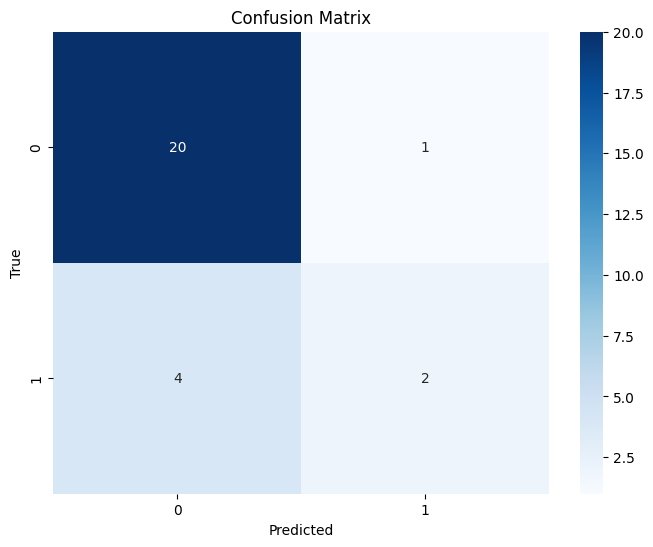

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
  Feature             Bin    Points
0     At1    [0.0, 0.204[  0.116496
1     At2    [0.0, 0.411[  0.163335
2     At5    [0.0, 0.033[  0.165332
3     At5  [0.033, 0.784[  0.042023
4     At6    [0.0, 0.506[  0.197596
5     At7    [0.0, 0.145[  0.284258


In [6]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.007936507936507936 @ quad_over_lin([[0.00 1.00 ... 1.00 0.00]
 [0.00 1.00 ... 1.00 0.00]
 ...
 [0.00 1.00 ... 1.00 0.00]
 [1.00 0.00 ... 0.00 0.00]] @ var901 + -[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.], 1.0) + norm1(p

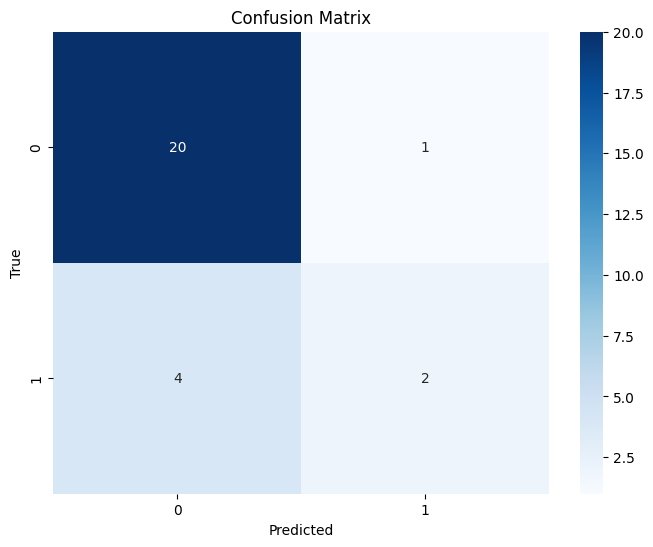

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430621
mse on train set:  0.10126582278481013

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.132503
1      At1  [0.204, 0.884[ -0.001592
2      At1    [0.884, inf[ -0.017009
3      At2    [0.0, 0.411[  0.222641
4      At2  [0.411, 0.964[ -0.028212
5      At2    [0.964, inf[ -0.080527
6      At3    [0.0, 0.153[ -0.161749
7      At3  [0.153, 0.927[  0.292660
8      At3    [0.927, inf[ -0.017009
9      At4    [0.0, 0.056[  0.160617
10     At4    [0.056, 1.0[  0.002800
11     At4      [1.0, inf[ -0.049515
12     At5    [0.0, 0.033[  0.036214
13     At5  [0.033, 0.784[  0.065002
14     At5    [0.78

In [7]:
start_time = time.time()

scorecard = Scorecard()
app_caim_1ook_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8858333333333335
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.885
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8858333333333335
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8858333333333335
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8983333333333334
testing parameters: {'C':

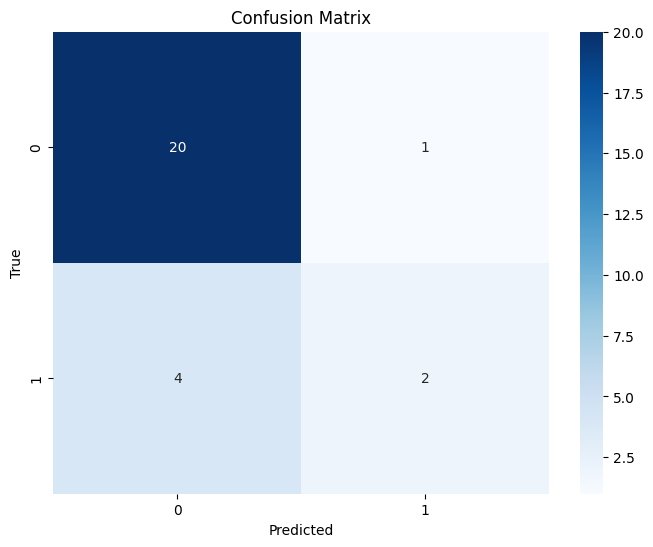

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9113924050632911
precision on train set:  0.910566868464502
recall on train set:  0.9113924050632911
f1 score on train set:  0.9041972018654231
balanced accuracy on train set:  0.7921875
logistic loss on train set:  0.6498690864159518
mse on train set:  0.08860759493670886

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.648940
1      At1  [0.204, 0.884[ -0.977154
2      At1    [0.884, inf[ -0.971521
3      At2    [0.0, 0.411[  0.290482
4      At2  [0.411, 0.964[ -1.214594
5      At2    [0.964, inf[ -1.843555
6      At3    [0.0, 0.153[  0.166956
7      At3  [0.153, 0.927[  3.394476
8      At3    [0.927, inf[ -0.446963
9      At4    [0.0, 0.056[  0.303365
10     At4    [0.056, 1.0[ -1.125005
11     At4      [1.0, inf[ -1.843570
12     At5    [0.0, 0.033[  0.252396
13     At5  [0.033, 0.784[  0.082548
14     At5    [0.784, inf[ -1

In [8]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

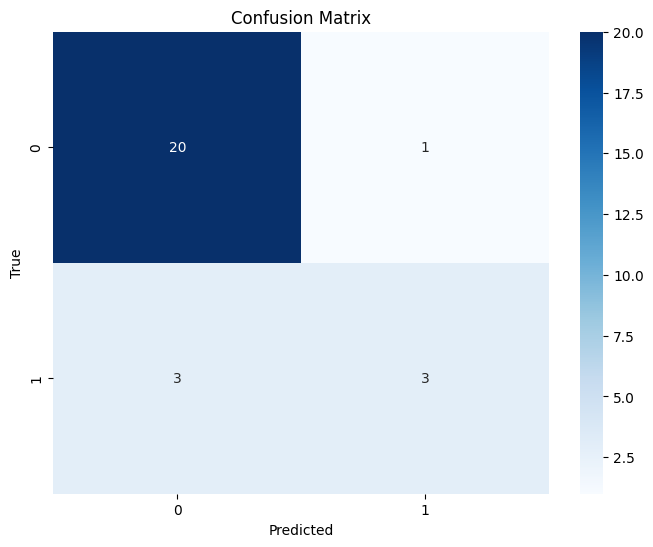

accuracy for class 0: 0.952
accuracy for class 1: 0.500

Evaluating the model on the train set...
accuracy on train set:  0.8860759493670886
precision on train set:  0.8799829964103533
recall on train set:  0.8860759493670886
f1 score on train set:  0.8810513093052467
balanced accuracy on train set:  0.7765625
logistic loss on train set:  0.6498690864159518
mse on train set:  0.11392405063291139

Scorecard table:
   Feature             Bin        Points
0      At1    [0.0, 0.204[ -3.108624e-15
1      At1  [0.204, 0.884[ -8.678714e-02
2      At2    [0.0, 0.411[ -3.108624e-15
3      At2  [0.411, 0.964[ -4.343912e-01
4      At3    [0.0, 0.153[ -3.108624e-15
5      At3  [0.153, 0.927[ -8.735526e-02
6      At4    [0.0, 0.056[ -3.108624e-15
7      At4    [0.056, 1.0[  4.353501e-01
8      At5    [0.0, 0.033[ -3.108624e-15
9      At5  [0.033, 0.784[ -5.217251e-01
10     At6    [0.0, 0.506[ -3.108624e-15
11     At6  [0.506, 0.956[ -8.706528e-02
12     At7    [0.0, 0.145[ -3.108624e-15
13     At

In [9]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.05912184715270996 seconds

Evaluating the model on the test set...
    True Value  Prediction
0            0           0
1            1           0
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           0
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
accuracy:  0.8518518518518519
precision:  0.8755555555555555
recall:  0.8518518518518519
f1 score:  0.821256038647343
balanced accuracy:  0.6666666666666666
lo

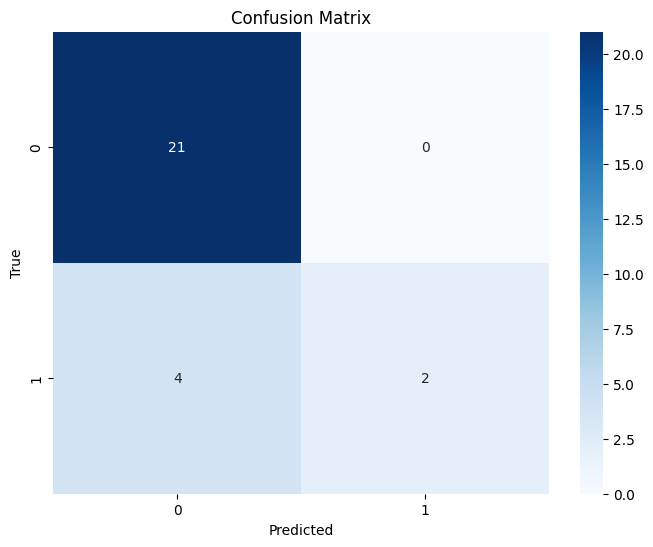

accuracy for class 0: 1.000
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430623
mse on train set:  0.10126582278481013

Scorecard table:
  Feature             Bin    Points
0     At1  [0.204, 0.884[ -0.286491
1     At2  [0.411, 0.964[ -0.276395
2     At5    [0.0, 0.033[  1.095360
3     At5  [0.033, 0.784[ -0.160616
4     At6  [0.506, 0.956[ -0.175063


In [10]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.9108333333333334
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

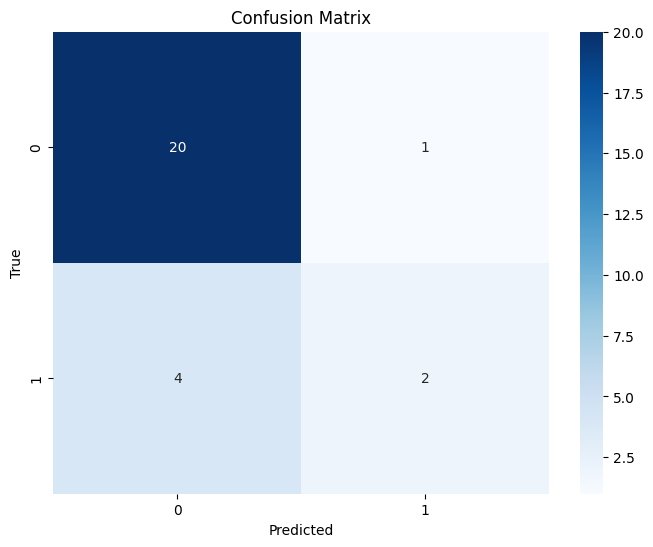

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.8987341772151899
precision on train set:  0.8978902953586498
recall on train set:  0.8987341772151899
f1 score on train set:  0.8883430946533157
balanced accuracy on train set:  0.7588541666666666
logistic loss on train set:  0.6546777635430621
mse on train set:  0.10126582278481013

Scorecard table:
   Feature             Bin    Points
0      At1    [0.0, 0.204[  0.136323
1      At1  [0.204, 0.884[ -0.134095
2      At1    [0.884, inf[ -0.017439
3      At2    [0.0, 0.411[  0.136323
4      At2  [0.411, 0.964[ -0.250853
5      At2    [0.964, inf[ -0.052316
6      At3    [0.0, 0.153[  0.136323
7      At3  [0.153, 0.927[  0.454409
8      At3    [0.927, inf[ -0.017439
9      At4    [0.0, 0.056[  0.136323
10     At4    [0.056, 1.0[ -0.157817
11     At4      [1.0, inf[ -0.052316
12     At5    [0.0, 0.033[  0.136323
13     At5  [0.033, 0.784[  0.028787
14     At5    [0.78

In [11]:
start_time = time.time()

scorecard = Scorecard()
app_caim_diff_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8483333333333334
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.835
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8483333333333334
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8491666666666667
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8241666666666667
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8233333333333335
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7849999999999999
testing parameters: {'C':

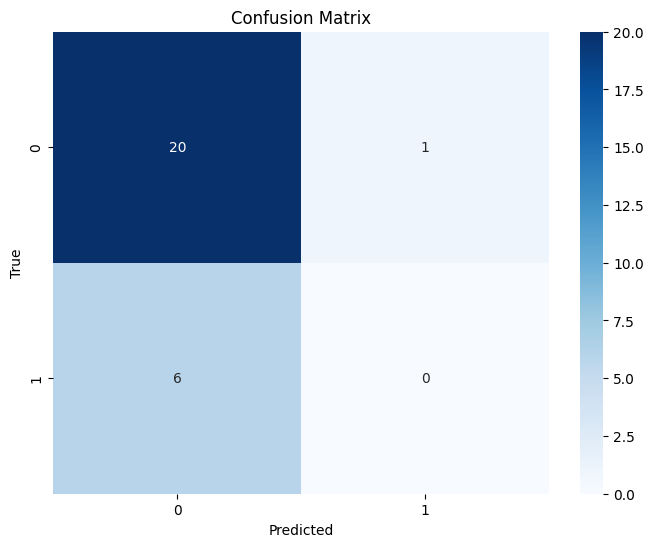

accuracy for class 0: 0.952
accuracy for class 1: 0.000

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
   Feature                            Bin    Points
0      At1                  [0.0935, 0.1[  4.145381
1      At1  [0.2535, 0.27749999999999997[  6.336459
2      At1                [0.362, 0.3665[  2.031389
3      At1                [0.411, 0.4155[  3.077207
4      At1               [0.4335, 0.4445[  1.415102
5      At1   [0.7155, 0.7575000000000001[  1.422656
6      At1     [0.7575000000000001, 0.78[  2.055922
7      At1      [0.8400000000000001, inf[  4.203452
8      At2  [0.0805, 0.16999999999999998[  1.812417
9      At2                [0.3215, 0.393[ -0.087583
10     At2                 [0.473, 0.491[  2.987553
11     At2                 [0.491, 0.509[

In [12]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

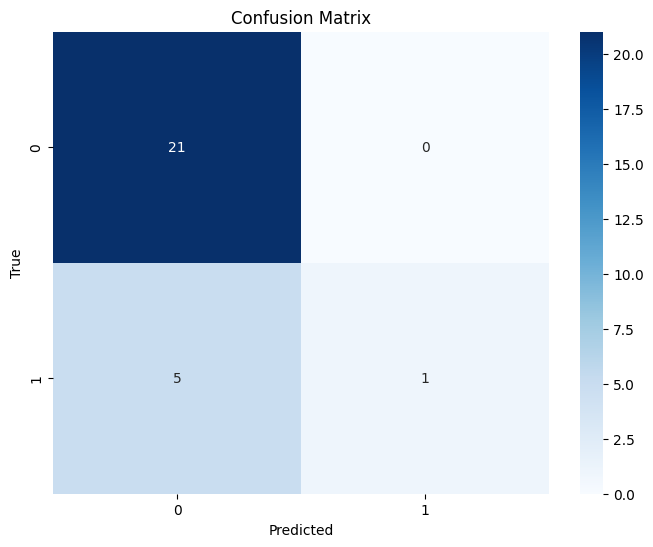

accuracy for class 0: 1.000
accuracy for class 1: 0.167

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.069897
1       At1              [0.0445, 0.0755[  0.098915
2       At1              [0.0755, 0.0935[ -0.030163
3       At1                 [0.0935, 0.1[  0.298525
4       At1                  [0.1, 0.109[ -0.048261
..      ...                           ...       ...
393     At7                [0.65, 0.6905[ -0.064987
394     At7               [0.6905, 0.731[ -0.086775
395     At7               [0.731, 0.7825[ -0.028257
396     At7  [0.7825, 0.8200000000000001[ -0.018309
397     At7     [0.8200000000000001, inf[  0.298525

[398 rows x 3 columns]


In [13]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_mm_model, app_infbins_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.015032052993774414 seconds

Evaluating the model on the test set...
    True Value  Prediction
0            0           0
1            1           1
2            1           0
3            0           0
4            0           0
5            0           0
6            0           0
7            0           0
8            0           0
9            1           0
10           0           0
11           0           0
12           1           1
13           0           0
14           1           1
15           0           0
16           0           1
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
accuracy:  0.8148148148148148
precision:  0.805050505050505
recall:  0.8148148148148148
f1 score:  0.8085506225041109
balanced accuracy:  0.7023809523809523
l

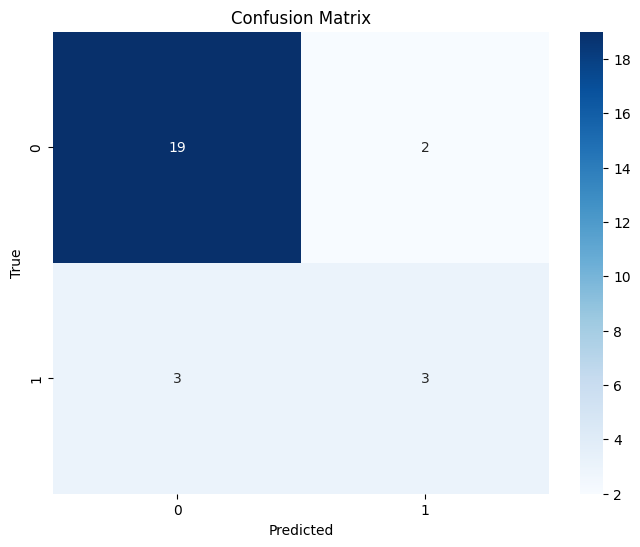

accuracy for class 0: 0.905
accuracy for class 1: 0.500

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
   Feature                            Bin    Points
0      At1  [0.2535, 0.27749999999999997[  0.998908
1      At1               [0.4335, 0.4445[  0.998908
2      At1      [0.8400000000000001, inf[  0.998908
3      At2                 [0.866, 0.884[  0.998908
4      At3               [0.0335, 0.0475[  0.998908
5      At3               [0.4355, 0.4425[  0.998908
6      At4    [0.14600000000000002, 0.16[  0.998908
7      At5               [0.1855, 0.1905[  0.998908
8      At6                 [0.715, 0.723[  0.998908
9      At7   [0.11199999999999999, 0.132[  0.998908
10     At7                [0.132, 0.1475[  0.998908
11     At7                [0.417, 0.4235[

In [14]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_beyondl1_model, app_infbins_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8991666666666667
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8991666666666667
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8991666666666667
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8991666666666667
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
AdaptiveLasso infeasible: minimize 0.007936507936507936 @ quad_over_lin([[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]] @ var5536 + -[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.], 1.0

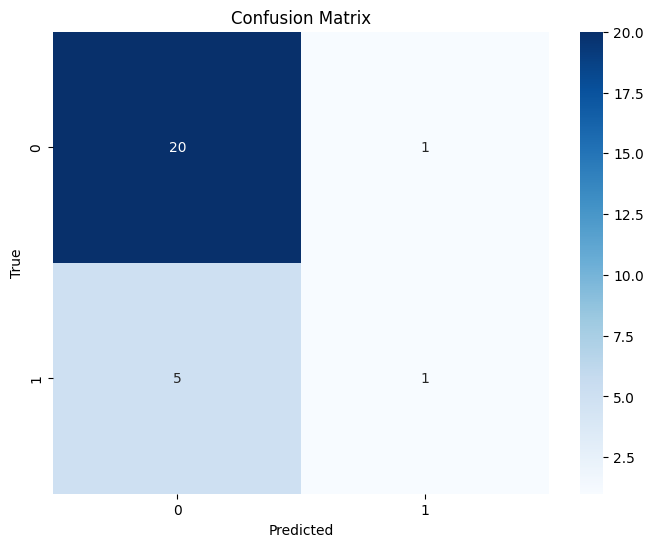

accuracy for class 0: 0.952
accuracy for class 1: 0.167

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.6210170236532891
mse on train set:  0.0

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.000492
1       At1              [0.0445, 0.0755[  0.071032
2       At1              [0.0755, 0.0935[  0.004298
3       At1                 [0.0935, 0.1[  0.200000
4       At1                  [0.1, 0.109[  0.001495
..      ...                           ...       ...
400     At7                [0.65, 0.6905[ -0.010634
401     At7               [0.6905, 0.731[ -0.012853
402     At7               [0.731, 0.7825[  0.003372
403     At7  [0.7825, 0.8200000000000001[  0.003447
404     At7     [0.8200000000000001, inf[  0.200000

[405 rows x 3 columns]


In [15]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_1ook_adaptive_lasso_model, app_infbins_1ook_adaptive_lasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8608333333333335
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8341666666666667
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8233333333333335
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8225
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8108333333333334
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.835
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8108333333333334
testing parameters: {'C': 2.5, 'class

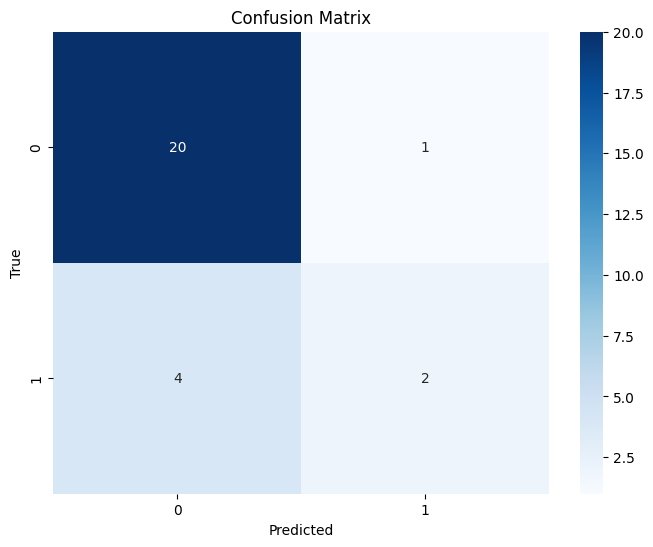

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9367088607594937
precision on train set:  0.9412951751972116
recall on train set:  0.9367088607594937
f1 score on train set:  0.9315694299038736
balanced accuracy on train set:  0.8333333333333333
logistic loss on train set:  0.6450604092888413
mse on train set:  0.06329113924050633

Scorecard table:
   Feature                            Bin    Points
0      At1               [0.3845, 0.3935[ -1.193364
1      At1                 [0.46, 0.4645[ -0.543308
2      At2  [0.0805, 0.16999999999999998[  0.550241
3      At2                 [0.741, 0.759[ -0.243616
4      At3                 [0.24, 0.2585[ -0.221459
5      At3               [0.4115, 0.4215[ -0.090319
6      At4   [0.33999999999999997, 0.354[ -0.742855
7      At5                  [0.106, 0.11[ -0.409853
8      At5    [0.11, 0.11699999999999999[ -0.312930
9      At6  [0.0665, 0.14100000000000001[  0.702940
10

In [16]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7841666666666667
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7966666666666666
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8099999999999999
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8474999999999999
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8358333333333334
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

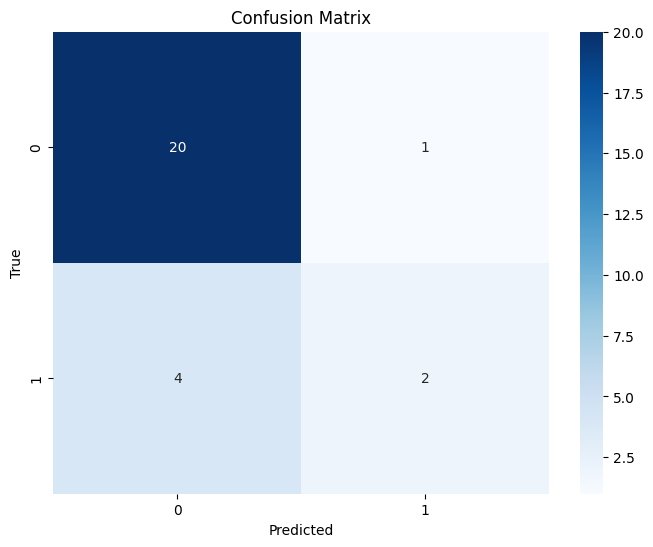

accuracy for class 0: 0.952
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9240506329113924
precision on train set:  0.9231706491572464
recall on train set:  0.9240506329113924
f1 score on train set:  0.9193591218907674
balanced accuracy on train set:  0.8255208333333333
logistic loss on train set:  0.6450604092888413
mse on train set:  0.0759493670886076

Scorecard table:
    Feature                           Bin    Points
0       At1              [0.0135, 0.0445[ -0.006626
1       At1              [0.0445, 0.0755[  0.001187
2       At1              [0.0755, 0.0935[  0.008999
3       At1                 [0.0935, 0.1[  0.008999
4       At1                  [0.1, 0.109[  0.001187
..      ...                           ...       ...
354     At7  [0.47150000000000003, 0.482[ -0.006454
355     At7               [0.482, 0.4845[ -0.006454
356     At7              [0.4845, 0.4865[ -0.006454
357     At7              [0.4865, 0.4895[ -0.006454
358

In [17]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_mm_model, app_caim_1ook_mm_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.02323293685913086 seconds

Evaluating the model on the test set...
    True Value  Prediction
0            0           1
1            1           0
2            1           0
3            0           0
4            0           1
5            0           0
6            0           1
7            0           0
8            0           0
9            1           1
10           0           0
11           0           0
12           1           0
13           0           0
14           1           1
15           0           0
16           0           0
17           0           0
18           0           1
19           0           0
20           1           0
21           0           0
22           0           0
23           0           0
24           0           0
25           0           0
26           0           0
accuracy:  0.7037037037037037
precision:  0.7037037037037037
recall:  0.7037037037037037
f1 score:  0.7037037037037037
balanced accuracy:  0.5714285714285714
l

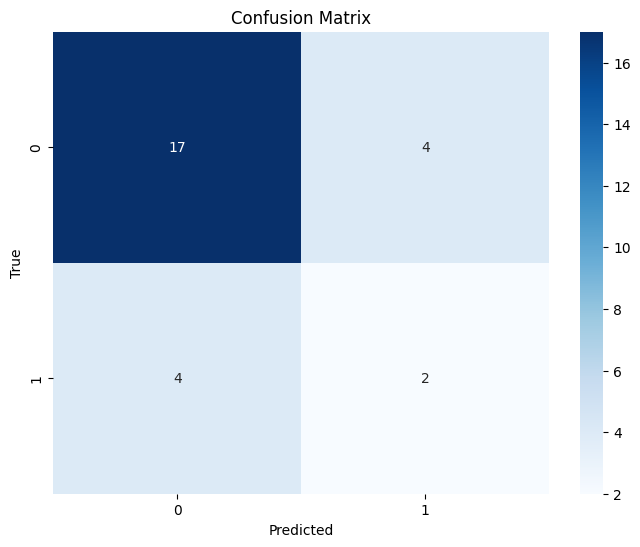

accuracy for class 0: 0.810
accuracy for class 1: 0.333

Evaluating the model on the train set...
accuracy on train set:  0.9873417721518988
precision on train set:  0.9875365141187926
recall on train set:  0.9873417721518988
f1 score on train set:  0.9871725897428089
balanced accuracy on train set:  0.9666666666666667
logistic loss on train set:  0.6258257007803997
mse on train set:  0.012658227848101266

Scorecard table:
   Feature                            Bin    Points
0      At1                [0.362, 0.3665[  0.069258
1      At1               [0.3845, 0.3935[ -0.902737
2      At2                 [0.741, 0.759[ -0.054418
3      At3                [0.4855, 0.497[ -0.098449
4      At4   [0.33999999999999997, 0.354[ -0.166351
5      At5                 [0.099, 0.103[  0.342829
6      At5  [0.11699999999999999, 0.1235[ -0.408793
7      At5                 [0.28, 0.3035[  0.262595
8      At6  [0.0665, 0.14100000000000001[  1.006351
9      At6                  [0.509, 0.52[ -0.496197
1

In [18]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_beyondl1_model, app_caim_1ook_beyondl1_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8466666666666667
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8466666666666667
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8466666666666667
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8466666666666667
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.007936507936507936 @ quad_over_lin([[1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]
 ...
 [1.00 1.00 ... 0.00 0.00]
 [1.00 1.00 ... 0.00 0.00]] @ var7786 + -[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.], 1.0) + norm1(

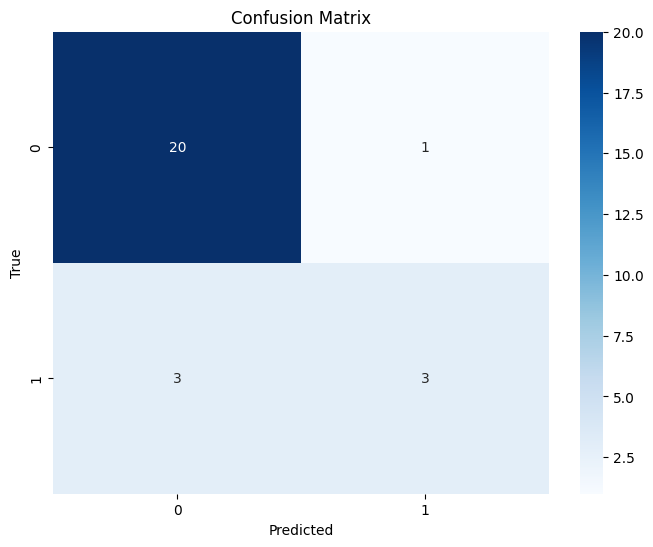

accuracy for class 0: 0.952
accuracy for class 1: 0.500

Evaluating the model on the train set...
accuracy on train set:  0.9113924050632911
precision on train set:  0.9094588955348449
recall on train set:  0.9113924050632911
f1 score on train set:  0.9102081281996622
balanced accuracy on train set:  0.8432291666666667
logistic loss on train set:  0.6402517321617308
mse on train set:  0.08860759493670886

Scorecard table:
  Feature                            Bin        Points
0     At1               [0.3845, 0.3935[ -5.135968e-17
1     At2  [0.0805, 0.16999999999999998[  2.957712e-01
2     At3                 [0.24, 0.2585[ -4.296328e-01
3     At6  [0.0665, 0.14100000000000001[  2.957885e-01
4     At6                 [0.744, 0.746[ -1.454888e-01


In [19]:
start_time = time.time()

scorecard = Scorecard()
app_infbins_diff_adaptivelasso_model, app_caim_1ook_adaptivelasso_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## mammo
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

#### load dataset

In [ ]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations without null: ", mammo_y.count())
print("num features: ", len(mammo_X.columns))
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

# proportion of positive class
print("Proportion of positive class: ", mammo_y.mean())

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations:  830
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64
Proportion of positive class:  0.4855421686746988


In [21]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

Categorical columns:  []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.789341935483871
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters:

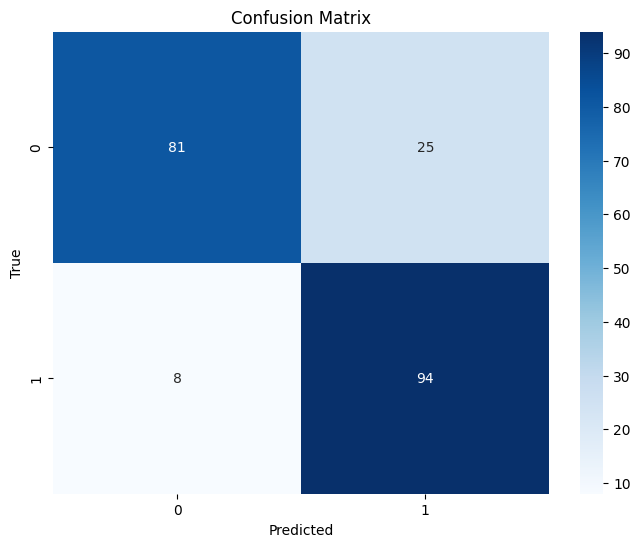

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
accuracy on train set:  0.8022508038585209
precision on train set:  0.8073236073531316
recall on train set:  0.8022508038585209
f1 score on train set:  0.8019290608344958
balanced accuracy on train set:  0.8039608366711171
logistic loss on train set:  0.535574098237173
mse on train set:  0.1977491961414791

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -1.143241
1   BI-RADS   [4.0, 55.0[  0.073606
2   BI-RADS   [55.0, inf[  6.462276
3       Age  [19.0, 57.0[ -0.417970
4       Age  [57.0, 96.0[  0.625624
5       Age   [96.0, inf[  7.085140
6     Shape    [1.0, 2.0[ -0.024376
7     Shape    [2.0, 4.0[ -0.129681
8     Shape    [4.0, inf[  0.984524
9    Margin    [1.0, 2.0[ -1.792830
10   Margin    [2.0, 5.0[ -0.075800
11   Margin    [5.0, inf[  0.589774
12  Density    [1.0, 2.0[  1.690199
13  Density    [2.0, 4.0[  0.043086
14  Density    [4.0, inf[ -0.812711


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': 'balanced'})
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5047741935483872
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5161548387096774
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7121677419354839
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6882322580645163
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941677419354838
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941677419354838
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

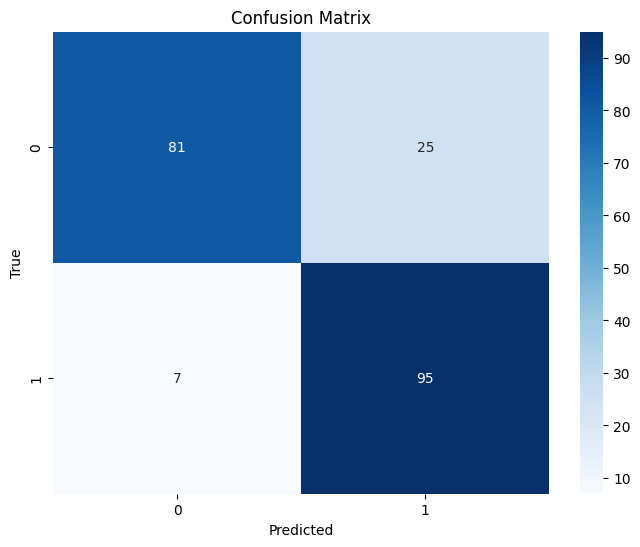

accuracy for class 0: 0.764
accuracy for class 1: 0.931

Evaluating the model on the train set...
accuracy on train set:  0.7958199356913184
precision on train set:  0.8003346131360601
recall on train set:  0.7958199356913184
f1 score on train set:  0.7955427029519743
balanced accuracy on train set:  0.7974198155680442
logistic loss on train set:  0.537406343380461
mse on train set:  0.20418006430868169

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.013629
1   BI-RADS   [4.0, 55.0[  0.009593
2   BI-RADS   [55.0, inf[  0.004036
3       Age  [19.0, 57.0[ -0.279566
4       Age  [57.0, 96.0[  0.275530
5       Age   [96.0, inf[  0.004036
6     Shape    [1.0, 2.0[ -0.235712
7     Shape    [2.0, 4.0[ -0.236099
8     Shape    [4.0, inf[  0.471812
9    Margin    [1.0, 2.0[ -0.491200
10   Margin    [2.0, 5.0[  0.245406
11   Margin    [5.0, inf[  0.245793
12  Density    [1.0, 2.0[  0.004790
13  Density    [2.0, 4.0[ -0.002395
14  Density    [4.0, inf[ -0.002395

In [23]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_mm_model, mammo_caim_1ook_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params=None)
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.009296894073486328 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
accuracy:  0.8413461538461539
precision:  0.8511698975182121
recall:  0.8413461538461539
f1 score:  0.8405325443786983
balanced accuracy:  0.8428597854236034
logistic loss:  0.52146815966609
mse:  0.15865384615384615
number of features:  15
number of non-zero weights:  7
model size (non-zero weights / all weights):  0.4666666666666667


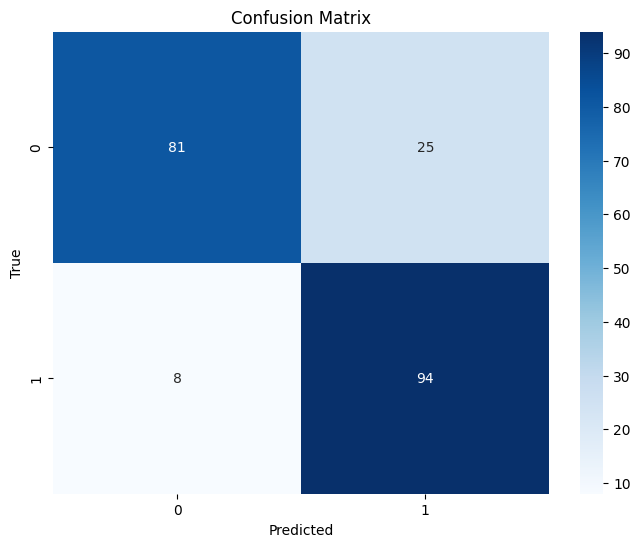

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
accuracy on train set:  0.7990353697749196
precision on train set:  0.8040747098699811
recall on train set:  0.7990353697749196
f1 score on train set:  0.798708395157008
balanced accuracy on train set:  0.8007420747042568
logistic loss on train set:  0.5361848466182689
mse on train set:  0.20096463022508038

Scorecard table:
  Feature           Bin    Points
0     Age  [19.0, 57.0[ -0.183392
1   Shape    [1.0, 2.0[  0.427461
2   Shape    [2.0, 4.0[  0.404214
3   Shape    [4.0, inf[  0.638105
4  Margin    [1.0, 2.0[ -0.131344
5  Margin    [2.0, 5.0[  0.187689
6  Margin    [5.0, inf[  0.302006


In [24]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_beyondl1_model, mammo_caim_1ook_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.001006036217303823 @ quad_over_lin([[0.00 1.00 ... 1.00 0.00]
 [0.00 1.00 ... 1.00 0.00]
 ...
 [0.00 1.00 ... 1.00 0.00]
 [0.00 1.00 ... 1.00 0.00]] @ var10081 + -[0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.

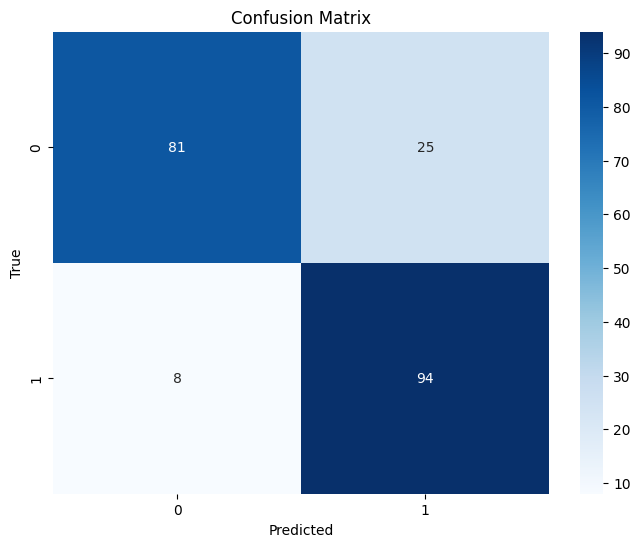

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
accuracy on train set:  0.8022508038585209
precision on train set:  0.8073236073531316
recall on train set:  0.8022508038585209
f1 score on train set:  0.8019290608344958
balanced accuracy on train set:  0.8039608366711171
logistic loss on train set:  0.535574098237173
mse on train set:  0.1977491961414791

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.073925
1   BI-RADS   [4.0, 55.0[  0.091924
2   BI-RADS   [55.0, inf[  0.465833
3       Age  [19.0, 57.0[ -0.100362
4       Age  [57.0, 96.0[  0.078453
5       Age   [96.0, inf[  0.505741
6     Shape    [1.0, 2.0[  0.096166
7     Shape    [2.0, 4.0[  0.077736
8     Shape    [4.0, inf[  0.309930
9    Margin    [1.0, 2.0[ -0.090472
10   Margin    [2.0, 5.0[  0.229120
11   Margin    [5.0, inf[  0.345184
12  Density    [1.0, 2.0[  0.378276
13  Density    [2.0, 4.0[  0.095479
14  Density    [4.0, inf[  0.010077


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_1ook_adaptivelasso_model, mammo_caim_1ook_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08})
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.789341935483871
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.790941935483871
testing parameters:

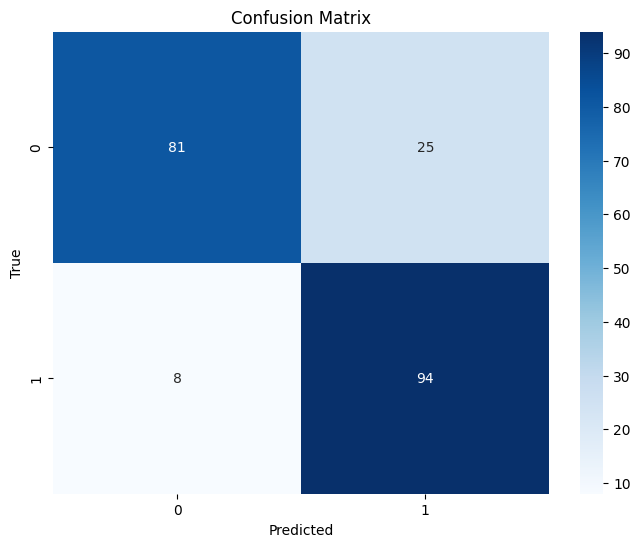

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
accuracy on train set:  0.8022508038585209
precision on train set:  0.8073236073531316
recall on train set:  0.8022508038585209
f1 score on train set:  0.8019290608344958
balanced accuracy on train set:  0.8039608366711171
logistic loss on train set:  0.535574098237173
mse on train set:  0.1977491961414791

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [0.0, 4.0[ -0.438059
1   BI-RADS   [4.0, 55.0[  1.217174
2   BI-RADS   [55.0, inf[  6.388867
3       Age  [19.0, 57.0[ -0.383837
4       Age  [57.0, 96.0[  1.043560
5       Age   [96.0, inf[  6.459261
6     Shape    [1.0, 2.0[ -0.039677
7     Shape    [2.0, 4.0[ -0.105537
8     Shape    [4.0, inf[  1.113940
9    Margin    [1.0, 2.0[ -0.162974
10   Margin    [2.0, 5.0[  1.717444
11   Margin    [5.0, inf[  0.665547
12  Density    [1.0, 2.0[ -0.553470
13  Density    [2.0, 4.0[ -1.643473
14  Density    [4.0, inf[ -0.855783


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': 'balanced'})
                
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5047741935483872
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5161548387096774
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5531612903225807
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5161548387096774
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7844774193548387
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7780774193548388
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

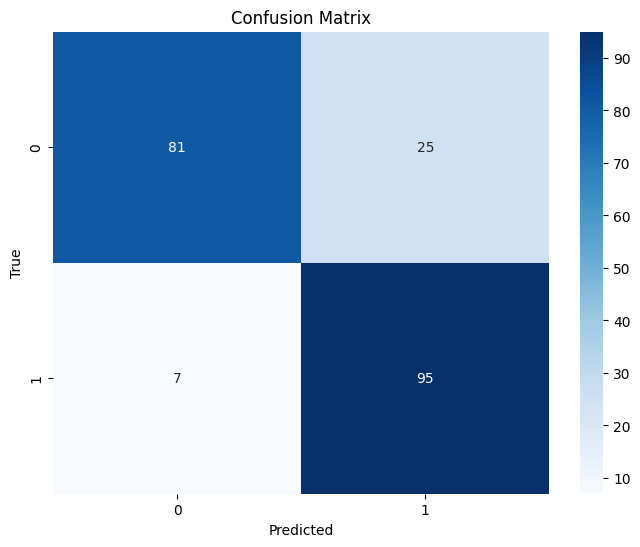

accuracy for class 0: 0.764
accuracy for class 1: 0.931

Evaluating the model on the train set...
accuracy on train set:  0.7990353697749196
precision on train set:  0.8040747098699811
recall on train set:  0.7990353697749196
f1 score on train set:  0.798708395157008
balanced accuracy on train set:  0.8007420747042568
logistic loss on train set:  0.5361848466182689
mse on train set:  0.20096463022508038

Scorecard table:
    Feature           Bin        Points
0   BI-RADS    [0.0, 4.0[  7.452372e-15
1   BI-RADS   [4.0, 55.0[  8.124859e-02
2   BI-RADS   [55.0, inf[  8.072051e-03
3       Age  [19.0, 57.0[  7.452372e-15
4       Age  [57.0, 96.0[  3.542253e-01
5       Age   [96.0, inf[  8.072051e-03
6     Shape    [1.0, 2.0[  7.452372e-15
7     Shape    [2.0, 4.0[  1.295658e-01
8     Shape    [4.0, inf[  7.387165e-01
9    Margin    [1.0, 2.0[  7.452372e-15
10   Margin    [2.0, 5.0[  7.774925e-01
11   Margin    [5.0, inf[  1.371997e-01
12  Density    [1.0, 2.0[  7.452372e-15
13  Density    

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_mm_model, mammo_caim_diff_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0078125, 'class_weight': 'balanced'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.010617256164550781 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
accuracy:  0.8509615384615384
precision:  0.8610167921965675
recall:  0.8509615384615384
f1 score:  0.8501972386587772
balanced accuracy:  0.8524787273399926
logistic loss:  0.5196417871033894
mse:  0.14903846153846154
number of features:  15
number of non-zero weights:  5
model size (non-zero weights / all weights):  0.3333333333333333


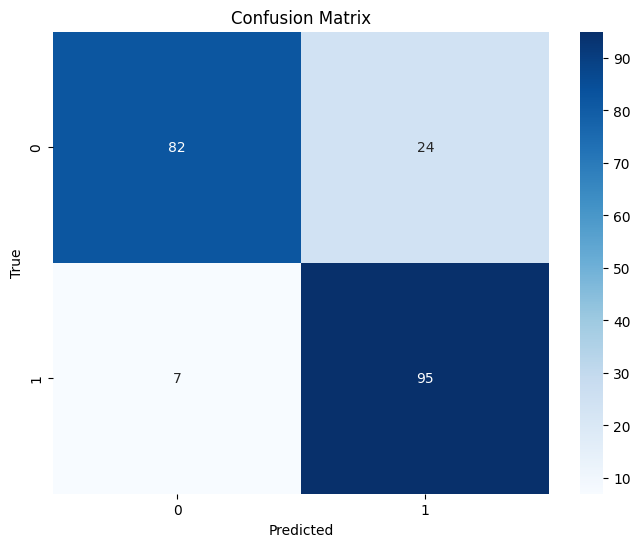

accuracy for class 0: 0.774
accuracy for class 1: 0.931

Evaluating the model on the train set...
accuracy on train set:  0.8006430868167203
precision on train set:  0.8049628617279736
recall on train set:  0.8006430868167203
f1 score on train set:  0.8003976851216192
balanced accuracy on train set:  0.8021962099336584
logistic loss on train set:  0.536795594999365
mse on train set:  0.19935691318327975

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.173955
1      Age  [57.0, 96.0[  0.179804
2    Shape    [4.0, inf[  0.231150
3   Margin    [2.0, 5.0[  0.307776
4   Margin    [5.0, inf[  0.112513


In [28]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_beyondl1_model, mammo_caim_diff_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7941548387096774
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.787716129032258
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7957806451612902
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fol

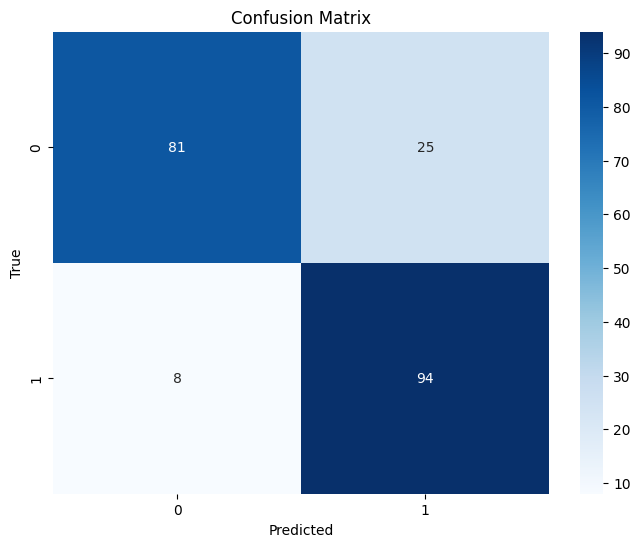

accuracy for class 0: 0.764
accuracy for class 1: 0.922

Evaluating the model on the train set...
accuracy on train set:  0.797427652733119
precision on train set:  0.801720137673888
recall on train set:  0.797427652733119
f1 score on train set:  0.7971782929461615
balanced accuracy on train set:  0.7989774479667981
logistic loss on train set:  0.537406343380461
mse on train set:  0.20257234726688103

Scorecard table:
   Feature           Bin    Points
0  BI-RADS   [4.0, 55.0[  0.042397
1      Age  [57.0, 96.0[  0.158266
2    Shape    [4.0, inf[  0.172651
3   Margin    [2.0, 5.0[  0.428399


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_caim_diff_adaptivelasso_model, mammo_caim_diff_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.04641588833612782})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7991741935483871
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7943483870967742
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7991741935483871
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7927483870967742
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8039870967741936
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.804
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8232516129032259
testing parameters: {'C':

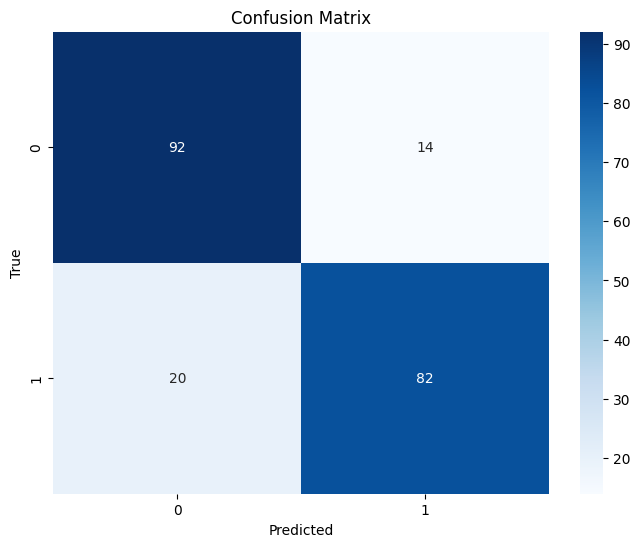

accuracy for class 0: 0.868
accuracy for class 1: 0.804

Evaluating the model on the train set...
accuracy on train set:  0.8536977491961415
precision on train set:  0.8539751087730454
recall on train set:  0.8536977491961415
f1 score on train set:  0.8535684771197839
balanced accuracy on train set:  0.8529770960764222
logistic loss on train set:  0.5404600852859411
mse on train set:  0.14630225080385853

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [1.0, 2.5[ -1.613095
1   BI-RADS    [2.5, 3.5[ -0.858714
2   BI-RADS    [3.5, 4.5[ -0.801002
3   BI-RADS    [4.5, 5.5[  2.068588
4   BI-RADS   [5.5, 30.5[  0.449634
5   BI-RADS   [30.5, inf[  0.702053
6       Age  [20.0, 21.5[ -0.196484
7       Age  [21.5, 22.5[ -0.019352
8       Age  [22.5, 23.5[ -0.631911
9       Age  [23.5, 24.5[ -0.612034
10      Age  [24.5, 26.0[ -0.107955
11      Age  [26.0, 27.5[ -1.276403
12      Age  [33.5, 34.5[ -0.000916
13      Age  [34.5, 35.5[  0.301458
14      Age  [35.5, 36.5[  0.80927

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 2.5, 'class_weight': 'balanced'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5047741935483872
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.5161548387096774
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7363741935483871
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6641935483870969
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8264129032258065
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8264129032258065
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

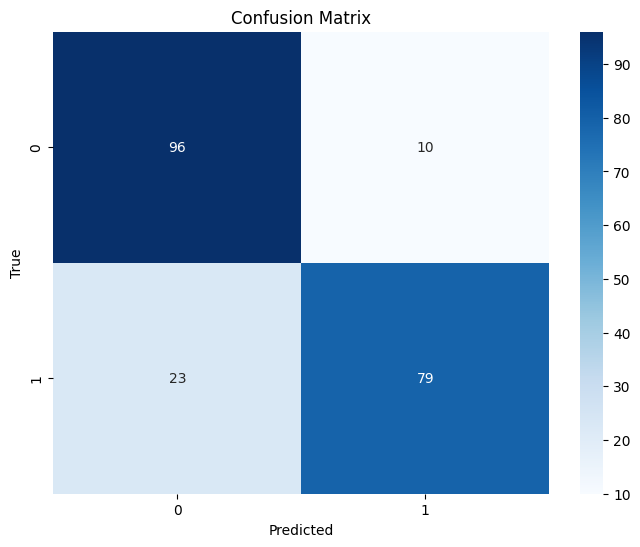

accuracy for class 0: 0.906
accuracy for class 1: 0.775

Evaluating the model on the train set...
accuracy on train set:  0.8360128617363344
precision on train set:  0.8464270179316195
recall on train set:  0.8360128617363344
f1 score on train set:  0.8341815455203271
balanced accuracy on train set:  0.8329452189482618
logistic loss on train set:  0.5575610399566295
mse on train set:  0.1639871382636656

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -0.650710
1   BI-RADS   [2.5, 3.5[ -0.669523
2   BI-RADS   [3.5, 4.5[ -0.679185
3   BI-RADS   [4.5, 5.5[  1.292613
4   BI-RADS  [5.5, 30.5[  0.456805
..      ...          ...       ...
70   Margin   [3.5, 4.5[  0.036893
71   Margin   [4.5, inf[  0.063531
72  Density   [1.5, 2.5[ -0.061120
73  Density   [2.5, 3.5[ -0.040652
74  Density   [3.5, inf[ -0.061933

[75 rows x 3 columns]


In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_mm_model, mammo_infbins_1ook_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.25, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.03898978233337402 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
accuracy:  0.8269230769230769
precision:  0.834371975717763
recall:  0.8269230769230769
f1 score:  0.8256309759669223
balanced accuracy:  0.8253792082870884
logistic loss:  0.5543428657947006
mse:  0.17307692307692307
number of features:  83
number of non-zero weights:  5
model size (non-zero weights / all weights):  0.060240963855421686


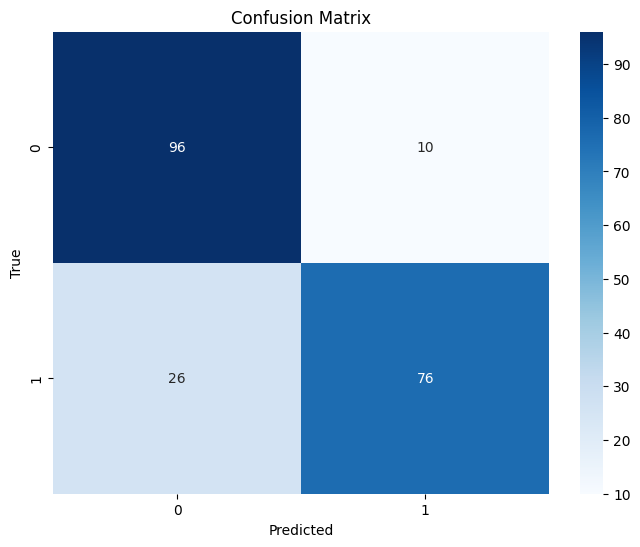

accuracy for class 0: 0.906
accuracy for class 1: 0.745

Evaluating the model on the train set...
accuracy on train set:  0.8183279742765274
precision on train set:  0.8346955894059007
recall on train set:  0.8183279742765274
f1 score on train set:  0.8152276740723574
balanced accuracy on train set:  0.8144657993603874
logistic loss on train set:  0.5655007689108777
mse on train set:  0.18167202572347266

Scorecard table:
   Feature         Bin    Points
0  BI-RADS  [4.5, 5.5[  0.504435
1    Shape  [2.5, 3.5[  0.202308
2    Shape  [3.5, inf[  0.288560
3   Margin  [3.5, 4.5[  0.064186
4  Density  [2.5, 3.5[  0.067270


In [32]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_beyondl1_model, mammo_infbins_1ook_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8119999999999999
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8232645161290323
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8184258064516129
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

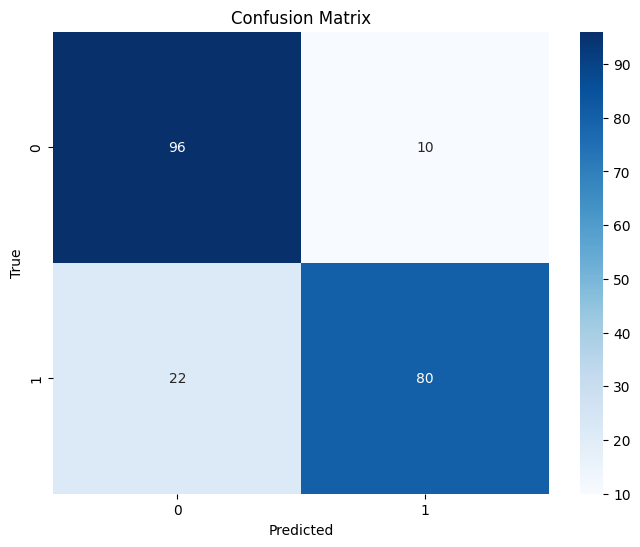

accuracy for class 0: 0.906
accuracy for class 1: 0.784

Evaluating the model on the train set...
accuracy on train set:  0.842443729903537
precision on train set:  0.8515314328354684
recall on train set:  0.842443729903537
f1 score on train set:  0.8408982997876313
balanced accuracy on train set:  0.8395897372206871
logistic loss on train set:  0.5551180464322455
mse on train set:  0.15755627009646303

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [4.5, 5.5[  0.487430
1   BI-RADS   [5.5, 30.5[  0.334256
2       Age  [62.5, 63.5[  0.244790
3       Age  [64.5, 65.5[  0.347290
4       Age  [66.5, 67.5[  0.332883
5       Age  [69.5, 70.5[  0.346103
6     Shape    [2.5, 3.5[  0.148201
7     Shape    [3.5, inf[  0.171444
8    Margin    [1.5, 2.5[  0.170504
9    Margin    [2.5, 3.5[  0.095438
10   Margin    [3.5, 4.5[  0.177525
11   Margin    [4.5, inf[  0.185580
12  Density    [2.5, 3.5[  0.092128


In [33]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_1ook_adaptivelasso_model, mammo_infbins_1ook_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7991741935483871
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7943483870967742
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7991741935483871
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7943612903225806
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8103612903225805
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8119741935483871
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8231870967741935
testing para

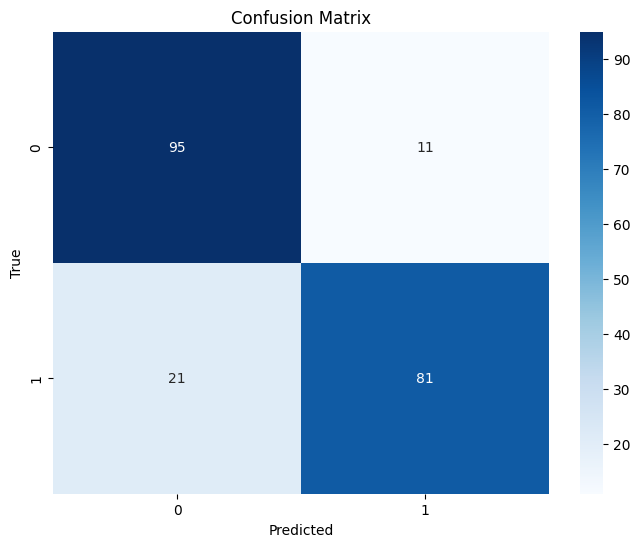

accuracy for class 0: 0.896
accuracy for class 1: 0.794

Evaluating the model on the train set...
accuracy on train set:  0.8488745980707395
precision on train set:  0.8502916510299943
recall on train set:  0.8488745980707395
f1 score on train set:  0.8485120101205353
balanced accuracy on train set:  0.8475797186946936
logistic loss on train set:  0.5447353239536132
mse on train set:  0.15112540192926044

Scorecard table:
    Feature           Bin    Points
0   BI-RADS    [1.0, 2.5[ -0.258378
1   BI-RADS    [4.5, 5.5[  2.584253
2       Age  [35.5, 36.5[  0.270281
3       Age  [38.5, 39.5[  0.295375
4       Age  [41.5, 42.5[  0.186838
5       Age  [43.5, 44.5[ -0.207582
6       Age  [49.5, 50.5[  0.214876
7       Age  [55.5, 56.5[  0.122817
8       Age  [57.5, 58.5[  0.134119
9       Age  [66.5, 67.5[  0.493219
10      Age  [67.5, 68.5[  0.880578
11      Age  [69.5, 70.5[  0.270906
12      Age  [71.5, 72.5[ -0.558098
13      Age  [73.5, 74.5[  0.246602
14    Shape    [1.5, 2.5[ -0.13331

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0101010101010102, 'class_weight': 'balanced'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7395225806451613
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7298967741935484
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7765290322580645
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7604774193548387
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8070451612903226
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8054451612903227
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

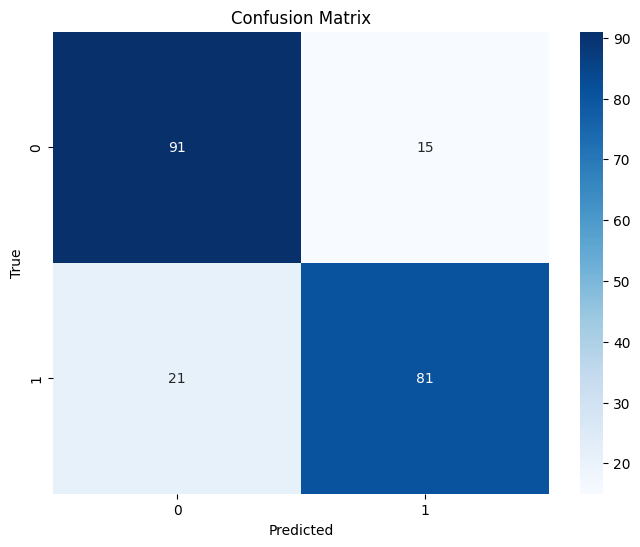

accuracy for class 0: 0.858
accuracy for class 1: 0.794

Evaluating the model on the train set...
accuracy on train set:  0.8408360128617364
precision on train set:  0.8415802804038599
recall on train set:  0.8408360128617364
f1 score on train set:  0.8405763234906095
balanced accuracy on train set:  0.8397915567009242
logistic loss on train set:  0.5447353239536132
mse on train set:  0.15916398713826366

Scorecard table:
    Feature          Bin    Points
0   BI-RADS   [1.0, 2.5[ -0.103451
1   BI-RADS   [2.5, 3.5[  0.021549
2   BI-RADS   [3.5, 4.5[  0.127778
3   BI-RADS   [4.5, 5.5[  1.583469
4   BI-RADS  [30.5, inf[  0.062500
..      ...          ...       ...
76   Margin   [3.5, 4.5[  0.094250
77   Margin   [4.5, inf[  0.086610
78  Density   [1.5, 2.5[ -0.096523
79  Density   [2.5, 3.5[  0.076260
80  Density   [3.5, inf[ -0.054200

[81 rows x 3 columns]


In [ ]:
start_time = time.time()
scorecard = Scorecard()

mammo_infbins_diff_mm_model, mammo_infbins_diff_mm_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0625, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.0077669620513916016 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             0           1
3             0           0
4             0           0
..          ...         ...
203           1           1
204           0           0
205           1           1
206           1           1
207           0           0

[208 rows x 2 columns]
accuracy:  0.8461538461538461
precision:  0.8491090992965056
recall:  0.8461538461538461
f1 score:  0.8456537425609589
balanced accuracy:  0.8451720310765816
logistic loss:  0.5452110029811976
mse:  0.15384615384615385
number of features:  83
number of non-zero weights:  9
model size (non-zero weights / all weights):  0.10843373493975904


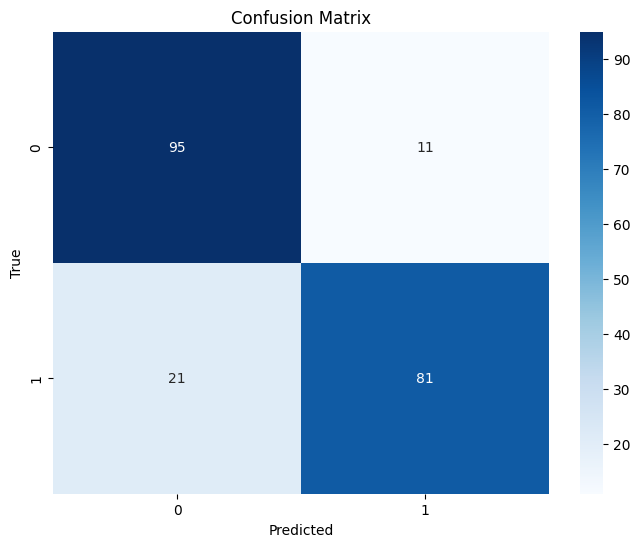

accuracy for class 0: 0.896
accuracy for class 1: 0.794

Evaluating the model on the train set...
accuracy on train set:  0.8504823151125402
precision on train set:  0.8544635777456212
recall on train set:  0.8504823151125402
f1 score on train set:  0.8497325045221715
balanced accuracy on train set:  0.8485163680773331
logistic loss on train set:  0.5483998142401894
mse on train set:  0.1495176848874598

Scorecard table:
   Feature           Bin    Points
0  BI-RADS    [4.5, 5.5[  0.452820
1      Age  [31.5, 32.5[  0.069270
2      Age  [57.5, 58.5[  0.072787
3      Age  [67.5, 68.5[  0.167673
4    Shape    [2.5, 3.5[  0.123069
5    Shape    [3.5, inf[  0.035048
6   Margin    [1.5, 2.5[  0.182440
7   Margin    [2.5, 3.5[ -0.115585
8   Margin    [3.5, 4.5[  0.089588


In [36]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_beyondl1_model, mammo_infbins_diff_beyondl1_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()      

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8087870967741935
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8119870967741936
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8344903225806451
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8200000000000001
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fo

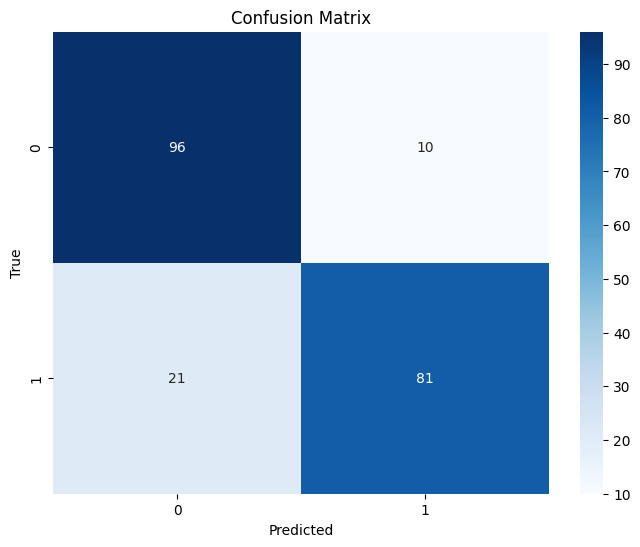

accuracy for class 0: 0.906
accuracy for class 1: 0.794

Evaluating the model on the train set...
accuracy on train set:  0.8488745980707395
precision on train set:  0.8513012337996906
recall on train set:  0.8488745980707395
f1 score on train set:  0.8483464568772482
balanced accuracy on train set:  0.8472692271866364
logistic loss on train set:  0.5465675690969013
mse on train set:  0.15112540192926044

Scorecard table:
    Feature           Bin        Points
0   BI-RADS    [4.5, 5.5[  4.632102e-01
1       Age  [35.5, 36.5[  3.448547e-02
2       Age  [36.5, 37.5[  5.046976e-03
3       Age  [39.5, 40.5[  3.412758e-02
4       Age  [49.5, 50.5[  2.886102e-02
5       Age  [55.5, 56.5[  1.023535e-17
6       Age  [57.5, 58.5[  3.190595e-02
7       Age  [66.5, 67.5[  7.438919e-02
8       Age  [67.5, 68.5[  1.985492e-01
9       Age  [71.5, 72.5[ -1.376252e-01
10    Shape    [2.5, 3.5[  1.212440e-01
11    Shape    [3.5, inf[  1.906502e-02
12   Margin    [1.5, 2.5[  9.079705e-02
13   Margin   

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mammo_infbins_diff_adaptivelasso_model, mammo_infbins_diff_adaptivelasso_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.003593813663804626})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## aesthetic evaluation (binary version)

#### load dataset

In [38]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_objective_evaluation = aesthetic_evaluation_data['Objective Evaluation']
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [39]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [40]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
print(aesthetic_evaluation_binary_y.value_counts())

# proportion of positive class
print("proportion of positive class: ", aesthetic_evaluation_binary_y.mean())

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64
proportion of positive class:  0.6649484536082474


In [41]:
aesthetic_evaluation_objective_binary_y = aesthetic_evaluation_objective_evaluation.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})
# accuracy of objective evaluation
acc = accuracy_score(aesthetic_evaluation_objective_binary_y, aesthetic_evaluation_binary_y)
print("Accuracy of objective evaluation: ", acc)

Accuracy of objective evaluation:  0.812960235640648


In [42]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")

K = 2

Categorical columns: []


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7996426156669564
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8134019124891335
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8006230078238191
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8124166908142568
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8006181783058051
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104510769825172
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8035786728484497
testing para

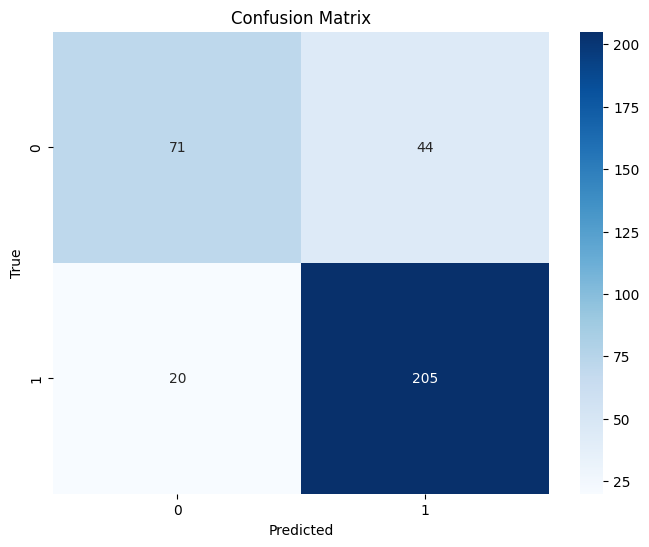

accuracy for class 0: 0.617
accuracy for class 1: 0.911

Evaluating the model on the train set...
accuracy on train set:  0.8369351669941061
precision on train set:  0.8344525706237498
recall on train set:  0.8369351669941061
f1 score on train set:  0.8331952155639712
balanced accuracy on train set:  0.7976704841228527
logistic loss on train set:  0.4614095664352797
mse on train set:  0.16306483300589392

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 4.028486686743844[  0.060104
1       BRA Value   [4.028486686743844, 24.075530326533293[ -0.083347
2       BRA Value                 [24.075530326533293, inf[ -0.011901
3       LBC Value   [0.0004087089954772, 2.079932905328359[ -0.108436
4       LBC Value    [2.079932905328359, 8.815417698806167[ -0.396540
..            ...                                       ...       ...
61    cEMDb Value   [0.6298054456710815, 4.141584396362305[  0.280218
62    cEMDb Va

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8094658553076404
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.782942142374191
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8094658553076404
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.802598280691587
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.815362696802859
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.806519849319038
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean 

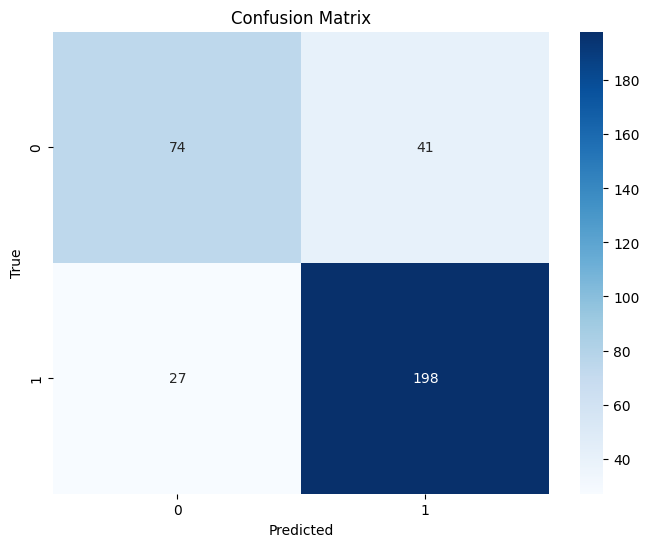

accuracy for class 0: 0.643
accuracy for class 1: 0.880

Evaluating the model on the train set...
accuracy on train set:  0.8300589390962672
precision on train set:  0.8271814195129166
recall on train set:  0.8300589390962672
f1 score on train set:  0.8262493918887784
balanced accuracy on train set:  0.7903088669095957
logistic loss on train set:  0.46290224027827265
mse on train set:  0.16994106090373282

Scorecard table:
          Feature                                           Bin    Points
0       BRA Value       [0.1623383287101974, 4.028486686743844[  0.053534
1       BRA Value       [4.028486686743844, 24.075530326533293[ -0.047686
2       BRA Value                     [24.075530326533293, inf[ -0.005848
3       LBC Value       [0.0004087089954772, 2.079932905328359[  0.173334
4       LBC Value        [2.079932905328359, 8.815417698806167[ -0.173334
5       UNR Value       [0.002082659100472, 2.2191903172066128[  0.184896
6       UNR Value      [2.2191903172066128, 27.52308736

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_mm_model, aesthetic_binary_caim_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.00390625, 'class_weight': 'balanced'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.9657962322235107 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335           1           1
336           1           1
337           1           1
338           1           1
339           1           1

[340 rows x 2 columns]
accuracy:  0.8029411764705883
precision:  0.8002157006365996
recall:  0.8029411764705883
f1 score:  0.7946907364198289
balanced accuracy:  0.7490821256038647
logistic loss:  0.46298126418760766
mse:  0.19705882352941176
number of features:  66
number of non-zero weights:  9
model size (non-zero weights / all weights):  0.13636363636363635


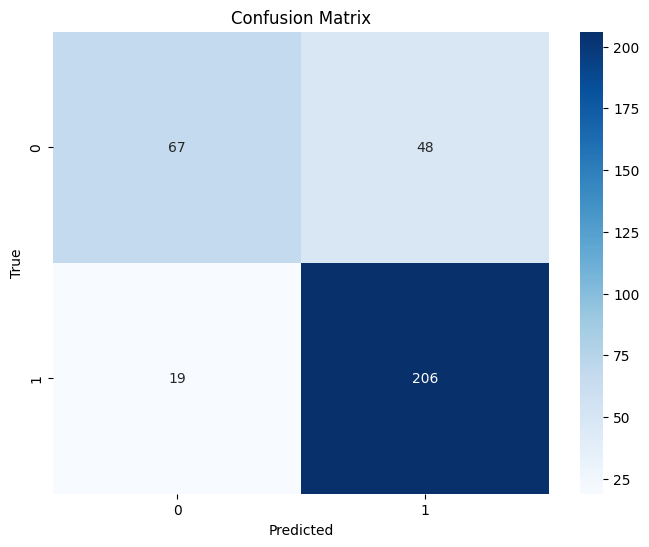

accuracy for class 0: 0.583
accuracy for class 1: 0.916

Evaluating the model on the train set...
accuracy on train set:  0.8290766208251473
precision on train set:  0.8263381398169368
recall on train set:  0.8290766208251473
f1 score on train set:  0.8246130250728767
balanced accuracy on train set:  0.7866389033489503
logistic loss on train set:  0.4617827348960279
mse on train set:  0.17092337917485265

Scorecard table:
      Feature                                       Bin    Points
0   BRA Value   [0.1623383287101974, 4.028486686743844[  0.059905
1   LBC Value   [0.0004087089954772, 2.079932905328359[  0.051926
2   UNR Value  [2.2191903172066128, 27.523087361909116[ -0.182459
3   BCE Value    [1.786720539932413, 27.26338581203124[ -0.130463
4  pLBC Value  [0.0754687169258525, 0.3166823979957318[ -0.246727
5  pBCE Value  [0.3739177872614725, 1.9451569659865504[ -0.136476
6  pBCD Value  [0.0001426824823106, 0.0765612868626487[  0.197924
7  pBOD Value  [0.3284043688800893, 1.37057687

In [45]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_beyondl1_model, aesthetic_binary_caim_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 0.0006142506142506142 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]
 ...
 [1.00 0.00 ... 0.00 0.00]
 [1.00 0.00 ... 0.00 0.00]] @ var19261 + -[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1

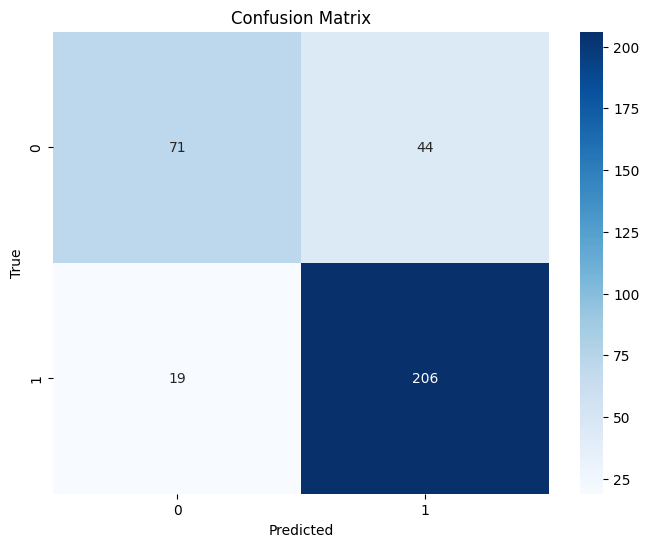

accuracy for class 0: 0.617
accuracy for class 1: 0.916

Evaluating the model on the train set...
accuracy on train set:  0.8369351669941061
precision on train set:  0.8357535700671495
recall on train set:  0.8369351669941061
f1 score on train set:  0.8313908905512366
balanced accuracy on train set:  0.7903392330383481
logistic loss on train set:  0.45767788182779706
mse on train set:  0.16306483300589392

Scorecard table:
          Feature                                           Bin        Points
0       BRA Value       [0.1623383287101974, 4.028486686743844[ -5.675713e-20
1       BRA Value       [4.028486686743844, 24.075530326533293[  4.478406e-19
2       LBC Value       [0.0004087089954772, 2.079932905328359[  1.102486e-20
3       LBC Value        [2.079932905328359, 8.815417698806167[ -3.706480e-02
4       UNR Value       [0.002082659100472, 2.2191903172066128[  1.271904e-01
5       BCE Value        [0.002408900783522, 1.786720539932413[  1.306900e-01
6       BCD Value       [3.

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_1ook_adaptivelasso_model, aesthetic_binary_caim_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.003593813663804626})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8006230078238191
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8134019124891335
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8006230078238191
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8124215203322709
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8016033999806819
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.811441128175408
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8035738433304356
testing param

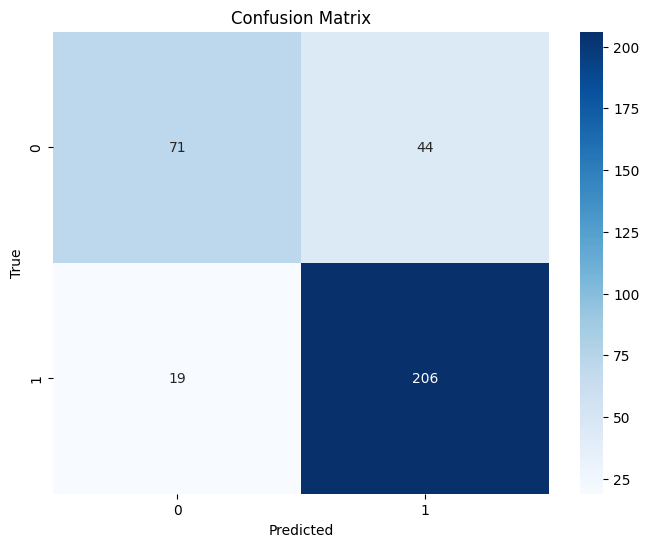

accuracy for class 0: 0.617
accuracy for class 1: 0.916

Evaluating the model on the train set...
accuracy on train set:  0.8369351669941061
precision on train set:  0.8344525706237498
recall on train set:  0.8369351669941061
f1 score on train set:  0.8331952155639712
balanced accuracy on train set:  0.7976704841228527
logistic loss on train set:  0.4614095664352797
mse on train set:  0.16306483300589392

Scorecard table:
          Feature                                       Bin    Points
0       BRA Value   [0.1623383287101974, 4.028486686743844[ -0.005159
1       BRA Value   [4.028486686743844, 24.075530326533293[ -0.143172
2       BRA Value                 [24.075530326533293, inf[ -3.516773
3       LBC Value   [0.0004087089954772, 2.079932905328359[  0.165400
4       LBC Value    [2.079932905328359, 8.815417698806167[ -0.289784
..            ...                                       ...       ...
61    cEMDb Value   [0.6298054456710815, 4.141584396362305[  0.211999
62    cEMDb Va

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7858881483627934
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6699845455423549
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8084854631507776
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7849077562059306
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8114362986573941
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8016178885347243
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

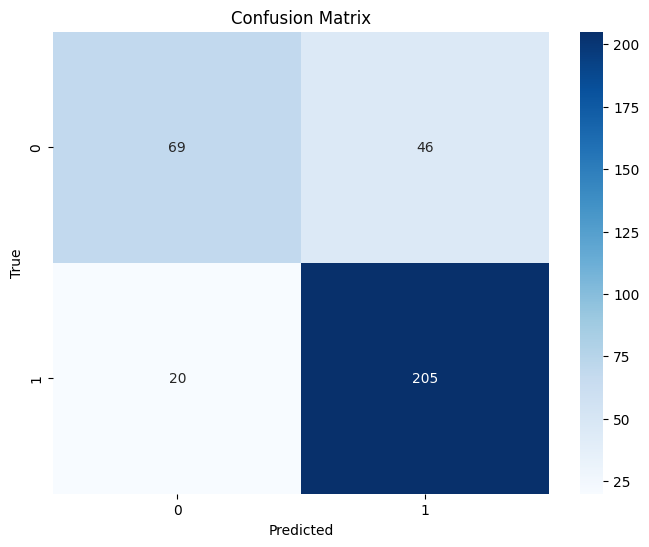

accuracy for class 0: 0.600
accuracy for class 1: 0.911

Evaluating the model on the train set...
accuracy on train set:  0.8300589390962672
precision on train set:  0.8303618388896803
recall on train set:  0.8300589390962672
f1 score on train set:  0.8224965176095786
balanced accuracy on train set:  0.776379489849037
logistic loss on train set:  0.4558120395240558
mse on train set:  0.16994106090373282

Scorecard table:
          Feature                                           Bin        Points
0       BRA Value       [0.1623383287101974, 4.028486686743844[  2.879641e-16
1       BRA Value       [4.028486686743844, 24.075530326533293[ -1.091420e-01
2       BRA Value                     [24.075530326533293, inf[ -1.562500e-02
3       LBC Value       [0.0004087089954772, 2.079932905328359[  2.879641e-16
4       LBC Value        [2.079932905328359, 8.815417698806167[ -4.409859e-01
5       UNR Value       [0.002082659100472, 2.2191903172066128[  2.879641e-16
6       UNR Value      [2.219

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_mm_model, aesthetic_binary_caim_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.015625, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.0462400913238525 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           0
2             1           1
3             1           0
4             1           1
..          ...         ...
335           1           1
336           1           1
337           1           1
338           1           1
339           1           1

[340 rows x 2 columns]
accuracy:  0.8117647058823529
precision:  0.809699428360686
recall:  0.8117647058823529
f1 score:  0.804231863009092
balanced accuracy:  0.76
logistic loss:  0.4618639539139555
mse:  0.18823529411764706
number of features:  66
number of non-zero weights:  10
model size (non-zero weights / all weights):  0.15151515151515152


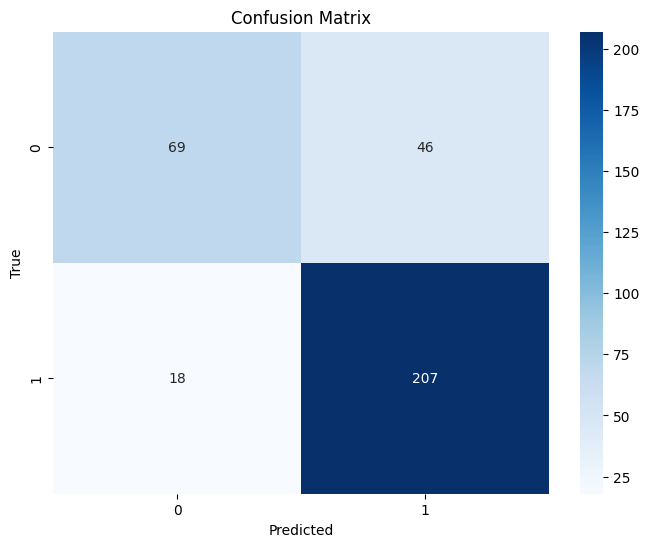

accuracy for class 0: 0.600
accuracy for class 1: 0.920

Evaluating the model on the train set...
accuracy on train set:  0.8271119842829077
precision on train set:  0.824774698852294
recall on train set:  0.8271119842829077
f1 score on train set:  0.8216350387163394
balanced accuracy on train set:  0.7807652264445601
logistic loss on train set:  0.4602900610530349
mse on train set:  0.17288801571709234

Scorecard table:
         Feature                                          Bin    Points
0      LBC Value       [2.079932905328359, 8.815417698806167[ -0.066553
1      BCE Value       [1.786720539932413, 27.26338581203124[ -0.132155
2     pLBC Value     [0.0754687169258525, 0.3166823979957318[ -0.240475
3     pUNR Value      [0.1200310010222253, 1.999999999999999[ -0.202155
4     pBCE Value     [0.3739177872614725, 1.9451569659865504[ -0.153028
5     pBCD Value      [0.0765612868626487, 0.630700937320437[ -0.193463
6     pBAD Value  [3.7207634025913874e-05, 0.225338251982673[  0.899629

In [49]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_beyondl1_model, aesthetic_binary_caim_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104559065005313
testing parameters: {'alpha': 0.003593813663804626}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.812431179368299
testing parameters: {'alpha': 0.04641588833612782}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7908142567371776
testing parameters: {'alpha': 0.5994842503189421}
  fold  1
  fol

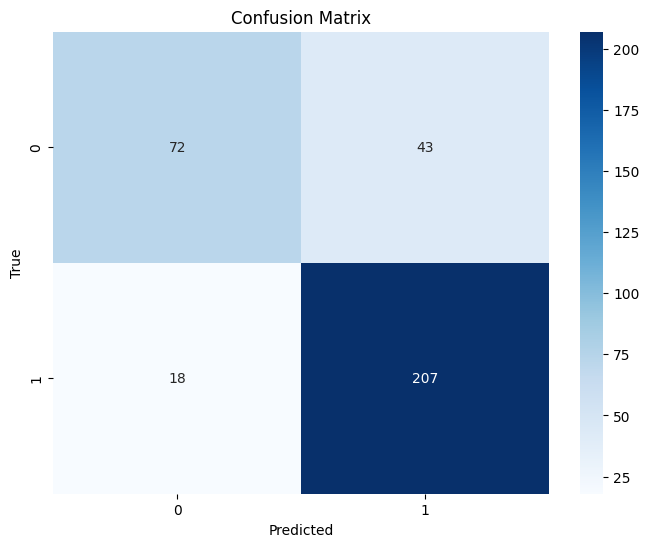

accuracy for class 0: 0.626
accuracy for class 1: 0.920

Evaluating the model on the train set...
accuracy on train set:  0.8320235756385069
precision on train set:  0.8305126238849392
recall on train set:  0.8320235756385069
f1 score on train set:  0.8262133620928794
balanced accuracy on train set:  0.7844525420787785
logistic loss on train set:  0.4584242187492936
mse on train set:  0.16797642436149313

Scorecard table:
          Feature                                           Bin        Points
0       BRA Value       [0.1623383287101974, 4.028486686743844[  4.176212e-02
1       LBC Value       [0.0004087089954772, 2.079932905328359[  4.194843e-02
2       LBC Value        [2.079932905328359, 8.815417698806167[ -2.339079e-02
3       UNR Value       [0.002082659100472, 2.2191903172066128[  4.189618e-02
4       UNR Value      [2.2191903172066128, 27.523087361909116[ -1.285892e-01
5       BCE Value        [0.002408900783522, 1.786720539932413[  4.194732e-02
6       BCE Value        [1.

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_caim_diff_adaptivelasso_model, aesthetic_binary_caim_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.003593813663804626})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7023857818989665
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7190862551917319
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6876122862938279
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7072587655751956
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6719163527479958
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.688708586883029
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6709118130010625
testing param

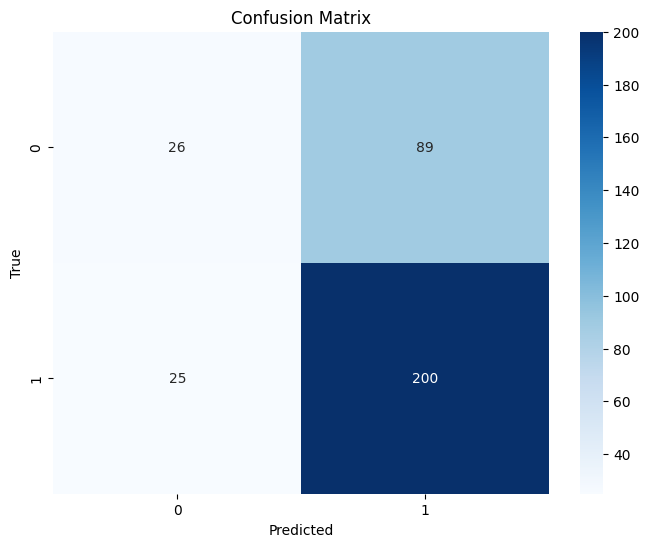

accuracy for class 0: 0.226
accuracy for class 1: 0.889

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
            Feature                                         Bin    Points
0         BRA Value  [0.23356299924095925, 0.25998993666774833[ -0.622993
1         BRA Value  [0.25998993666774833, 0.26979525183184316[ -1.996000
2         BRA Value   [0.26979525183184316, 0.2772706540547385[ -0.363213
3         BRA Value     [0.2772706540547385, 0.284913290130897[ -0.033117
4         BRA Value    [0.284913290130897, 0.29489299511289246[ -2.356694
...             ...                                         ...       ...
6364  cEMDLab Value    [0.5915114794066924, 0.6055320635832555[ -0.973260
6365  cEMDLab Value     [0.609410512476939, 0.6209906983832364[ -1.38090

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                params={'C': 1000.0, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.40981358060465567
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6660484883608616
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.40981358060465567
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6660484883608616
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.40981358060465567
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.6660484883608616
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5


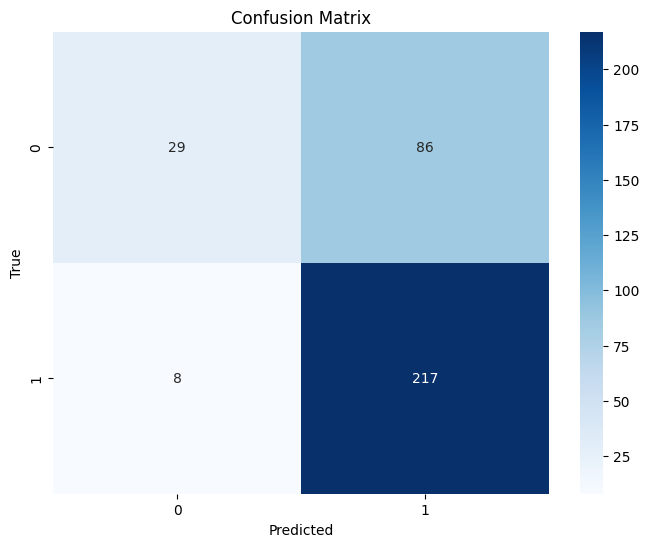

accuracy for class 0: 0.252
accuracy for class 1: 0.964

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.030362
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.030362
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.030318
3          BRA Value  [0.20882918670067196, 0.21511673901980122[ -0.060580
4          BRA Value  [0.21511673901980122, 0.23356299924095925[ -0.060575
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.030362
22370  cEMDLab Value     [0.7891429096576522, 0.820575702394075[

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_mm_model, aesthetic_binary_infbins_1ook_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM',
                params={'C': 0.0625, 'class_weight': 'balanced'})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 0.3836050033569336 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335           1           1
336           1           1
337           1           1
338           1           1
339           1           1

[340 rows x 2 columns]
accuracy:  0.6617647058823529
precision:  0.43793252595155713
recall:  0.6617647058823529
f1 score:  0.5270692347735555
balanced accuracy:  0.5
logistic loss:  0.4417523689882172
mse:  0.3382352941176471
number of features:  22374
number of non-zero weights:  0
model size (non-zero weights / all weights):  0.0


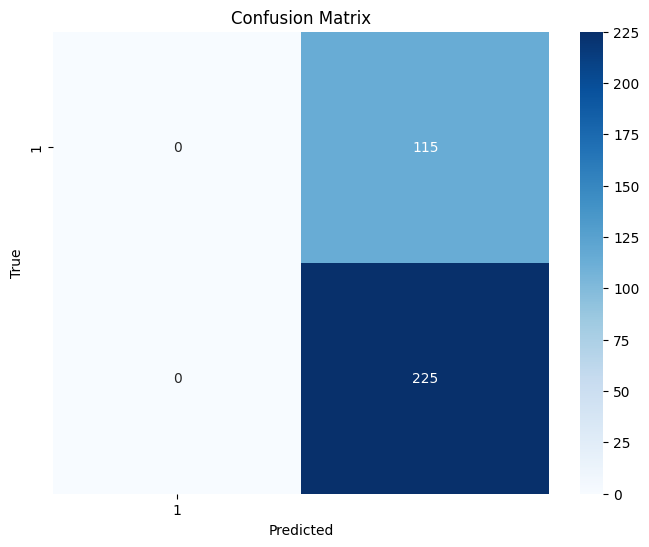

accuracy for class 0: 0.000
accuracy for class 1: 1.000

Evaluating the model on the train set...
accuracy on train set:  0.6660117878192534
precision on train set:  0.4435717015141983
recall on train set:  0.6660117878192534
f1 score on train set:  0.5324952737517143
balanced accuracy on train set:  0.5
logistic loss on train set:  0.44013896417262915
mse on train set:  0.33398821218074654

Scorecard table:
Empty DataFrame
Columns: [Feature, Bin, Points]
Index: []


In [53]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_beyondl1_model, aesthetic_binary_infbins_1ook_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.763324640200908
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.763324640200908
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7613541968511542
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.763324640200908
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7682169419491934
testing parameters: {'alpha': 0.003593813663804626}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.3339515116391384
testing parameters: {'alpha': 0.04641588833612782}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.3339515116391384
testing parameters: {'alpha': 0.5994842503189421}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.1859122959528639
testing parameters: {'alpha': 7.742636826811277}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  mean score: 0.12610837438423644
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
best parameters:  {'alpha': 0.0002782559402207126}
best score:  0.7682169419491934


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 1503.7060759067535 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           1
1             0           1
2             1           1
3             1           1
4             1           1
..          ...         ...
335           1           1
336           1           1
337           1           1
338           1           1
339           1           1

[340 rows x 2 columns]
accuracy:  0.7294117647058823
precision:  0.745939878634817
recall:  0.7294117647058823
f1 score:  0.6821914386217675
balanced accuracy:  0.6170048309178744
logistic loss:  0.45069085117743424
mse:  0.27058823529411763
number of features:  22374
number of non-zero weights:  14897
model size (non-zero weights / all weights):  0.6658174667024225


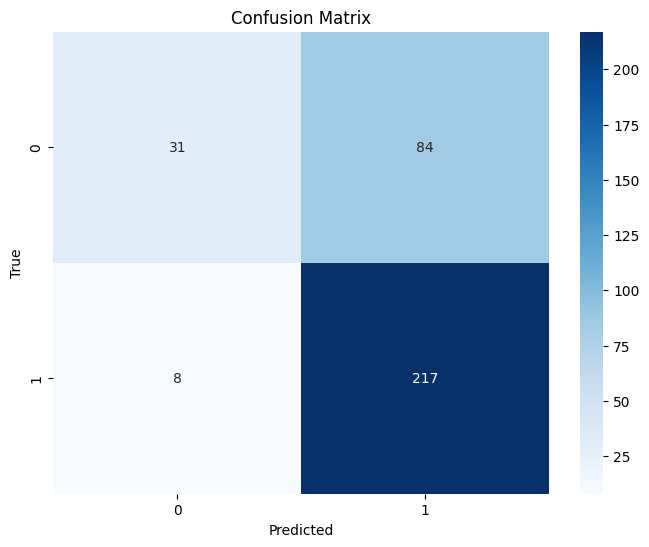

accuracy for class 0: 0.270
accuracy for class 1: 0.964

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.045376
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.045376
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.045376
3          BRA Value   [0.3244746116292725, 0.33359830460351236[  0.045376
4          BRA Value  [0.33359830460351236, 0.33569655002749277[  0.045376
...              ...                                         ...       ...
14892  cEMDLab Value    [0.6581204339353381, 0.7048440329659416[  0.045376
14893  cEMDLab Value    [0.7379367386634916, 0.7650779384374097[

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_1ook_adaptivelasso_model, aesthetic_binary_infbins_1ook_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 0.0002782559402207126})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7711629479377958
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7760745677581378
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7751134936733314
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7810006761325219
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.765266106442577
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7711581184197817
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7691828455520139
testing param

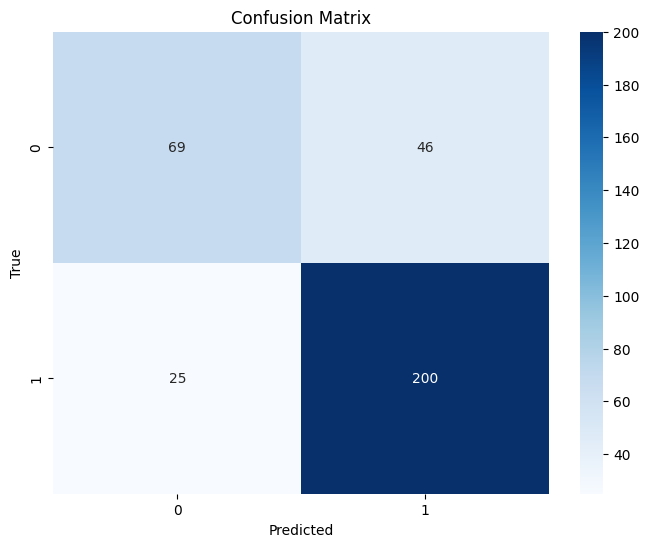

accuracy for class 0: 0.600
accuracy for class 1: 0.889

Evaluating the model on the train set...
accuracy on train set:  0.9862475442043221
precision on train set:  0.9864336950792416
recall on train set:  0.9862475442043221
f1 score on train set:  0.9861843369408428
balanced accuracy on train set:  0.9801448898143328
logistic loss on train set:  0.4405121326333774
mse on train set:  0.0137524557956778

Scorecard table:
           Feature                                         Bin    Points
0        BRA Value    [0.6164959370005569, 0.6209507954866085[  0.248638
1        BRA Value    [0.6209507954866085, 0.6293314782034336[  0.051166
2        BRA Value    [0.6293314782034336, 0.6353864843854173[  0.002960
3        BRA Value    [0.9550784154710588, 0.9568718263608624[  0.204472
4        BRA Value    [0.9568718263608624, 0.9587965516910595[  0.166511
..             ...                                         ...       ...
685  cEMDLab Value   [0.1616788983720473, 0.16203892173477635[ -

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params={'C': 1.0101010101010102, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8104655655365594
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8144209407901093
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7937892398338645
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8124553269583696
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7898338645803149
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7967014391963682
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

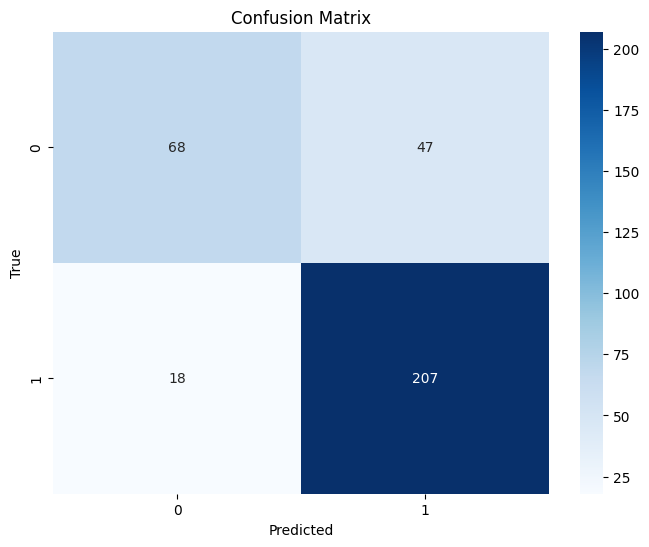

accuracy for class 0: 0.591
accuracy for class 1: 0.920

Evaluating the model on the train set...
accuracy on train set:  0.888015717092338
precision on train set:  0.8901796159822513
recall on train set:  0.888015717092338
f1 score on train set:  0.8845958092236093
balanced accuracy on train set:  0.8499479437792816
logistic loss on train set:  0.4490950072305872
mse on train set:  0.11198428290766209

Scorecard table:
             Feature                                         Bin        Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[ -3.957338e-17
1          BRA Value    [0.189619931322902, 0.20154489666341896[ -3.957338e-17
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  9.765625e-04
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  9.765625e-04
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  9.765625e-04
...              ...                                         ...           ...
22203  cEMDLab Value   

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_mm_model, aesthetic_binary_infbins_diff_mm_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.0009765625, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 1.0686042308807373 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           1
2             1           1
3             1           0
4             1           1
..          ...         ...
335           1           1
336           1           1
337           1           1
338           1           1
339           1           1

[340 rows x 2 columns]
accuracy:  0.8088235294117647
precision:  0.8067540420306558
recall:  0.8088235294117647
f1 score:  0.8008193711535654
balanced accuracy:  0.7556521739130435
logistic loss:  0.4618639539139555
mse:  0.19117647058823528
number of features:  22374
number of non-zero weights:  16
model size (non-zero weights / all weights):  0.000715115759363547


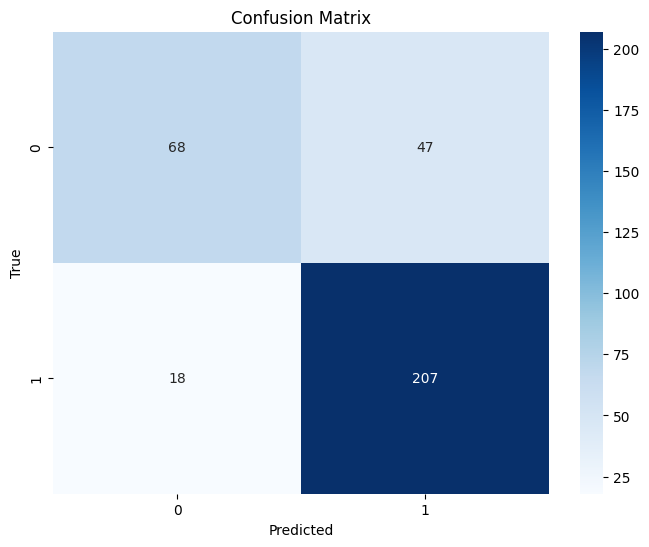

accuracy for class 0: 0.591
accuracy for class 1: 0.920

Evaluating the model on the train set...
accuracy on train set:  0.849705304518664
precision on train set:  0.8502976439450108
recall on train set:  0.849705304518664
f1 score on train set:  0.8441472990191714
balanced accuracy on train set:  0.8028587541211174
logistic loss on train set:  0.4543193656810628
mse on train set:  0.15029469548133595

Scorecard table:
        Feature                                         Bin    Points
0     BRA Value    [1.6175251746564627, 1.6221069762729003[  0.112175
1     LBC Value      [1.45257388316516, 1.4532499477191012[ -0.150901
2     BCD Value    [1.4950344781117648, 1.4971771552967654[ -0.069631
3     BAD Value      [24.556336882452037, 24.6627575025323[  0.124266
4    pBRA Value    [0.0081901961756122, 0.0085189579098216[  0.105744
5    pBRA Value   [0.1449434181014957, 0.14506710444623505[ -0.100712
6    pLBC Value  [0.01807060342663725, 0.01819216669080275[ -0.080408
7    pLBC Value 

In [57]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_beyondl1_model, aesthetic_binary_infbins_diff_beyondl1_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1',
                params=None)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.733840432724814
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.733840432724814
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.733840432724814
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.7279484207476093
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  mean score: 0.6935284458611031
testing parameters: {'alpha': 0.003593813663804626}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 0.04641588833612782}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.15098039215686274
testing parameters: {'alpha': 0.5994842503189421}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.1973727422003284
testing parameters: {'alpha': 7.742636826811277}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
testing parameters: {'alpha': 100.0}
  fold  1


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  2


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  3


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  4


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  fold  5


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


AdaptiveLasso infeasible: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.
  mean score: 0.0
best parameters:  {'alpha': 1e-08}
best score:  0.733840432724814


/opt/homebrew/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:250: UserWarning: Your problem has too many parameters for efficient DPP compilation. We suggest setting 'ignore_dpp = True'.
  warnings.warn(


Execution time: 5168.941867113113 seconds

Evaluating the model on the test set...
     True Value  Prediction
0             0           0
1             0           1
2             1           1
3             1           0
4             1           1
..          ...         ...
335           1           0
336           1           1
337           1           0
338           1           0
339           1           1

[340 rows x 2 columns]
accuracy:  0.7205882352941176
precision:  0.7237076648841355
recall:  0.7205882352941176
f1 score:  0.7219909718608936
balanced accuracy:  0.6932367149758454
logistic loss:  0.4976178826708234
mse:  0.27941176470588236
number of features:  22374
number of non-zero weights:  22374
model size (non-zero weights / all weights):  1.0


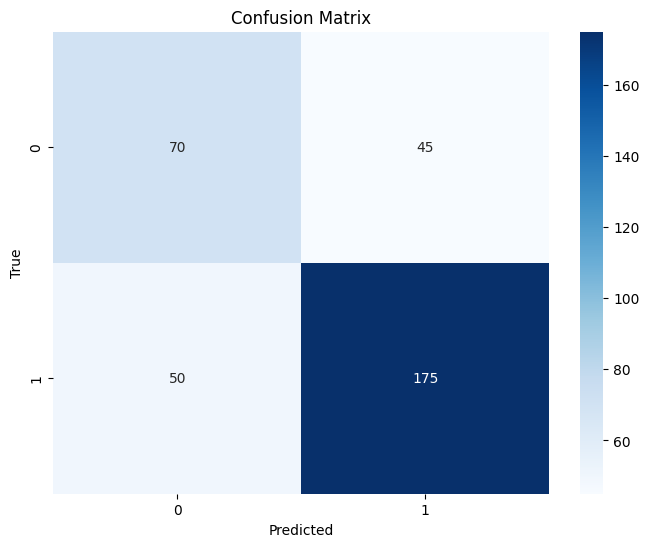

accuracy for class 0: 0.609
accuracy for class 1: 0.778

Evaluating the model on the train set...
accuracy on train set:  1.0
precision on train set:  1.0
recall on train set:  1.0
f1 score on train set:  1.0
balanced accuracy on train set:  1.0
logistic loss on train set:  0.44013896417262915
mse on train set:  0.0

Scorecard table:
             Feature                                         Bin    Points
0          BRA Value    [0.17135143897882216, 0.189619931322902[  0.005636
1          BRA Value    [0.189619931322902, 0.20154489666341896[  0.003807
2          BRA Value  [0.20154489666341896, 0.20882918670067196[  0.008792
3          BRA Value  [0.20882918670067196, 0.21511673901980122[  0.006024
4          BRA Value  [0.21511673901980122, 0.23356299924095925[  0.007363
...              ...                                         ...       ...
22369  cEMDLab Value    [0.7650779384374097, 0.7891429096576522[  0.010146
22370  cEMDLab Value     [0.7891429096576522, 0.820575702394075[

In [ ]:
start_time = time.time()

scorecard = Scorecard()
aesthetic_binary_infbins_diff_adaptivelasso_model, aesthetic_binary_infbins_diff_adaptivelasso_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## income
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

#### load dataset

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


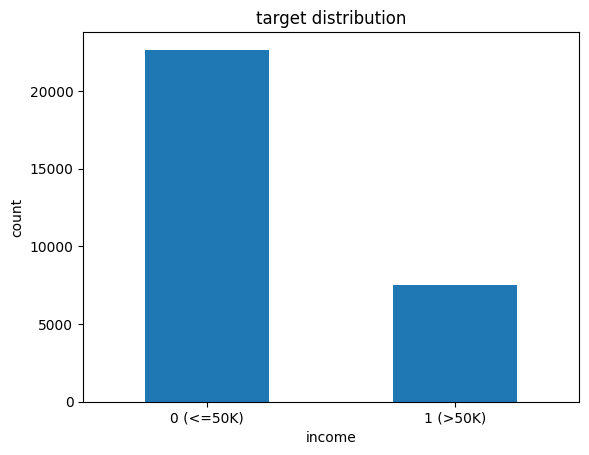

Proportion of positive class:  0.24892248524633645


In [2]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", adult_y.mean())

In [3]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [4]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]


#### CAIM & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7471821738939285
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8237481131937219
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7471821738939285
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8237481131937219
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7471821738939285
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8237481131937219
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7471821738939285
testing para

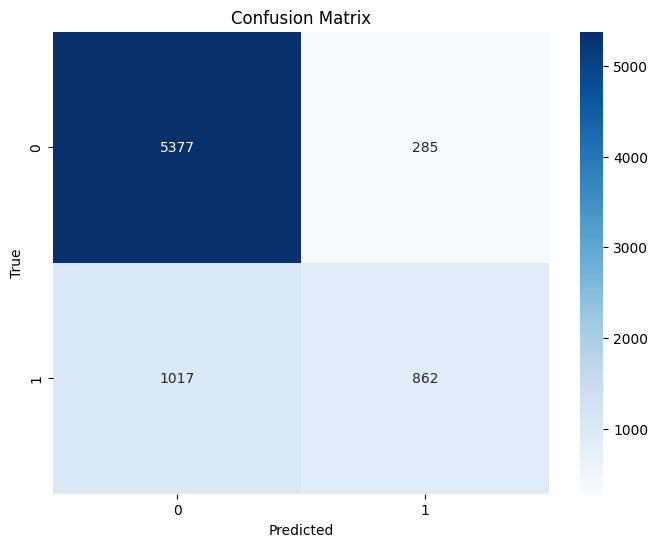

accuracy for class 0: 0.950
accuracy for class 1: 0.459

Evaluating the model on the train set...
accuracy on train set:  0.824322532160382
precision on train set:  0.8151852773007553
recall on train set:  0.824322532160382
f1 score on train set:  0.8075381452573491
balanced accuracy on train set:  0.6973184678633215
logistic loss on train set:  0.6511298734740345
mse on train set:  0.17567746783961805

Scorecard table:
           Feature                    Bin    Points
0              age           [17.0, 31.0[ -1.300638
1              age           [31.0, 90.0[  0.458644
2              age            [90.0, inf[ -0.933620
3        workclass                      0 -0.121430
4           fnlwgt    [14878.0, 209280.0[ -0.021149
5           fnlwgt  [209280.0, 1484705.0[ -0.004521
6           fnlwgt       [1484705.0, inf[ -3.455534
7        education                      0  0.048472
8    education-num            [1.0, 13.0[ -0.255455
9    education-num           [13.0, 16.0[  1.021395
10  

In [62]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7713180532555652
testing parameters: {'C': 0.0009765625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7946599547654987
testing parameters: {'C': 0.001953125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7957654547142068
testing parameters: {'C': 0.001953125, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8040759607446596
testing parameters: {'C': 0.00390625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7985947017991217
testing parameters: {'C': 0.00390625, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8084082926662466
testing parameters: {'C': 0.0078125, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  m

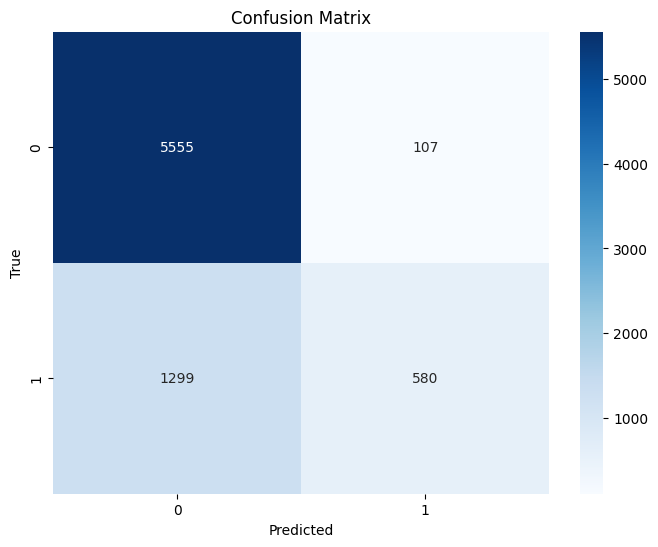

accuracy for class 0: 0.981
accuracy for class 1: 0.309

Evaluating the model on the train set...
accuracy on train set:  0.8117678263560408
precision on train set:  0.816509539886145
recall on train set:  0.8117678263560408
f1 score on train set:  0.7764442163650662
balanced accuracy on train set:  0.6411445039794259
logistic loss on train set:  0.6646486313493974
mse on train set:  0.18823217364395917

Scorecard table:
           Feature                  Bin        Points
0              age         [17.0, 31.0[ -1.428922e-04
1              age         [31.0, 90.0[  1.428922e-04
2        workclass                    0 -1.243450e-14
3           fnlwgt  [14878.0, 209280.0[ -8.881784e-16
4        education                    0 -1.243450e-14
5    education-num          [1.0, 13.0[ -6.665236e-01
6    education-num         [13.0, 16.0[ -6.665105e-01
7    education-num          [16.0, inf[  1.333034e+00
8   marital-status                    0 -1.243450e-14
9       occupation                 

In [63]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_mm_model, adult_caim_1ook_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 5.2944676876068115 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.8248242938602307
precision:  0.8163256830068021
recall:  0.8248242938602307
f1 score:  0.8073754586783176
balanced accuracy:  0.6961312158458517
logistic loss:  0.6515365961212154
mse:  0.17517570613976927
number of features:  116
number of non-zero weights:  5
model size (non-zero weights / all weights):  0.04310344827586207


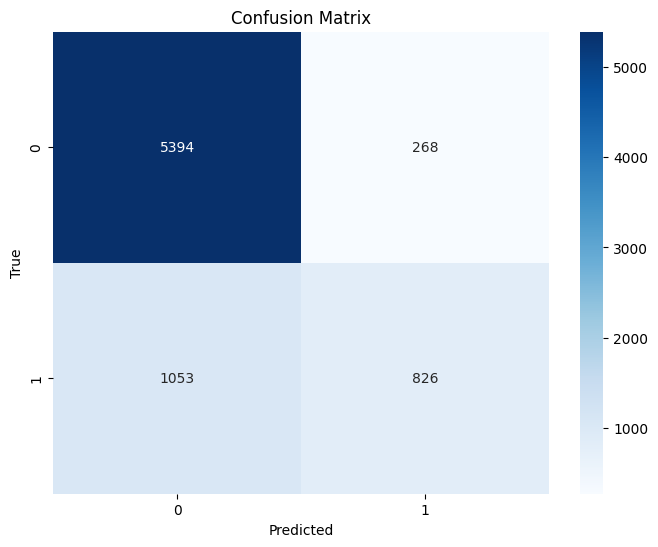

accuracy for class 0: 0.953
accuracy for class 1: 0.440

Evaluating the model on the train set...
accuracy on train set:  0.821007028866982
precision on train set:  0.811799038057174
recall on train set:  0.821007028866982
f1 score on train set:  0.8022486741523635
balanced accuracy on train set:  0.6881617338697671
logistic loss on train set:  0.6530947115751742
mse on train set:  0.178992971133018

Scorecard table:
          Feature               Bin    Points
0             age      [31.0, 90.0[  0.189084
1   education-num      [13.0, 16.0[  0.196383
2    capital-gain     [0.0, 5060.0[ -0.613367
3    capital-loss  [1816.0, 4356.0[  0.417612
4  hours-per-week      [41.0, 99.0[  0.125612


In [64]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_beyondl1_model, adult_caim_1ook_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'alpha': 1e-08}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8199461777823371
testing parameters: {'alpha': 1.2915496650148827e-07}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8199461777823371
testing parameters: {'alpha': 1.6681005372000591e-06}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8199461777823371
testing parameters: {'alpha': 2.1544346900318867e-05}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8199461777823371
testing parameters: {'alpha': 0.0002782559402207126}
  fold  1
AdaptiveLasso infeasible: minimize 2.7630415561450043e-05 @ quad_over_lin([[1.00 0.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]
 ...
 [0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.00 0.00]] @ var28441 + -[0. 1. 0. ... 1. 1. 0.], 1.0) + norm1(param28443 @ var28441) is infeasible.
  fold  2
AdaptiveLasso infeasible: minimize 2.762888876609383e-05 @ quad_over_lin([[0.00 1.00 ... 0.00 0.00]
 [0.00 1.00 ... 0.

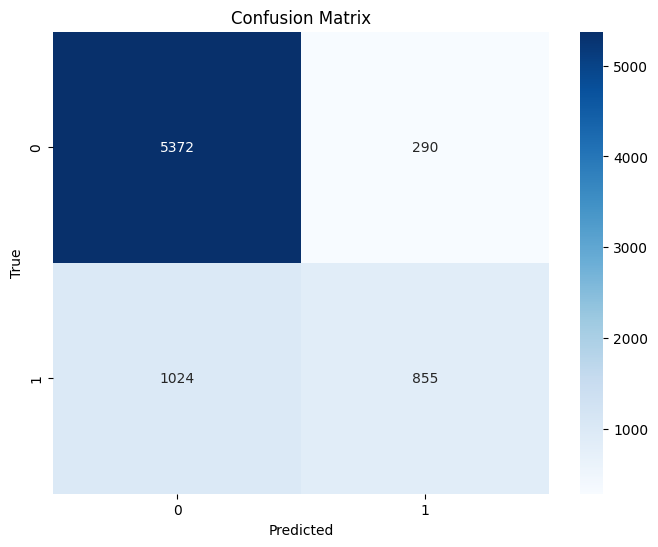

accuracy for class 0: 0.949
accuracy for class 1: 0.455

Evaluating the model on the train set...
accuracy on train set:  0.8218911630785554
precision on train set:  0.8121800107848639
recall on train set:  0.8218911630785554
f1 score on train set:  0.8046405645860405
balanced accuracy on train set:  0.6933834548372214
logistic loss on train set:  0.6517848195077477
mse on train set:  0.17810883692144466

Scorecard table:
           Feature                    Bin        Points
0              age           [17.0, 31.0[  3.518691e-18
1              age           [31.0, 90.0[  1.870455e-01
2        workclass                      0  1.251358e-15
3           fnlwgt    [14878.0, 209280.0[  2.105000e-18
4           fnlwgt  [209280.0, 1484705.0[  1.521223e-18
5        education                      0  1.251358e-15
6    education-num            [1.0, 13.0[ -3.587544e-01
7    education-num           [13.0, 16.0[ -1.455556e-01
8    education-num            [16.0, inf[  1.021614e-14
9   marital-st

In [65]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_adaptivelasso_model, adult_caim_1ook_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### CAIM & Diff Coding

Execution time: 5.5531299114227295 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.8273438536003183
precision:  0.8186640171393378
recall:  0.8273438536003183
f1 score:  0.8117023421779668
balanced accuracy:  0.704209543131253
logistic loss:  0.6497230597534256
mse:  0.17265614639968174
number of features:  108
number of non-zero weights:  18
model size (non-zero weights / all weights):  0.16666666666666666


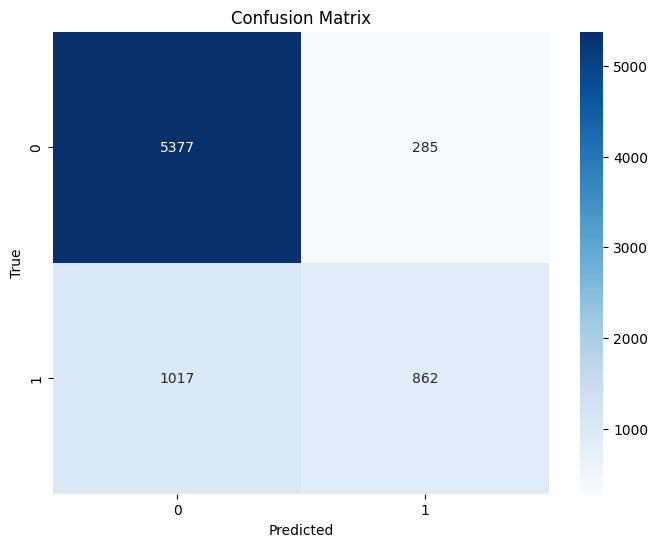

accuracy for class 0: 0.950
accuracy for class 1: 0.459

Evaluating the model on the train set...
accuracy on train set:  0.824322532160382
precision on train set:  0.8151852773007553
recall on train set:  0.824322532160382
f1 score on train set:  0.8075381452573491
balanced accuracy on train set:  0.6973184678633215
logistic loss on train set:  0.6511298734740345
mse on train set:  0.17567746783961805

Scorecard table:
col weights         Feature    Weight
0  featage-bin1 -0.661592
1  featage-bin2  1.758716
2  featage-bin3 -1.388242:
col weights               Feature  Weight
3  featworkclass-bin1     0.0
4  featworkclass-bin2     0.0
5  featworkclass-bin3     0.0
6  featworkclass-bin4     0.0
7  featworkclass-bin5     0.0
8  featworkclass-bin6     0.0:
col weights             Feature    Weight
9   featfnlwgt-bin1 -0.494368
10  featfnlwgt-bin2  0.016403
11  featfnlwgt-bin3 -1.141915:
col weights                    Feature    Weight
12      feateducation-bin1  0.000000
13      feateduca

In [5]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_ml_model, adult_caim_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                params= {'C': 100.0, 'class_weight': None})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 10.377110004425049 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.8135525792335234
precision:  0.8188913243930879
recall:  0.8135525792335234
f1 score:  0.7791252356447166
balanced accuracy:  0.6448884555524453
logistic loss:  0.6639290946344448
mse:  0.1864474207664766
number of features:  108
number of non-zero weights:  17
model size (non-zero weights / all weights):  0.1574074074074074


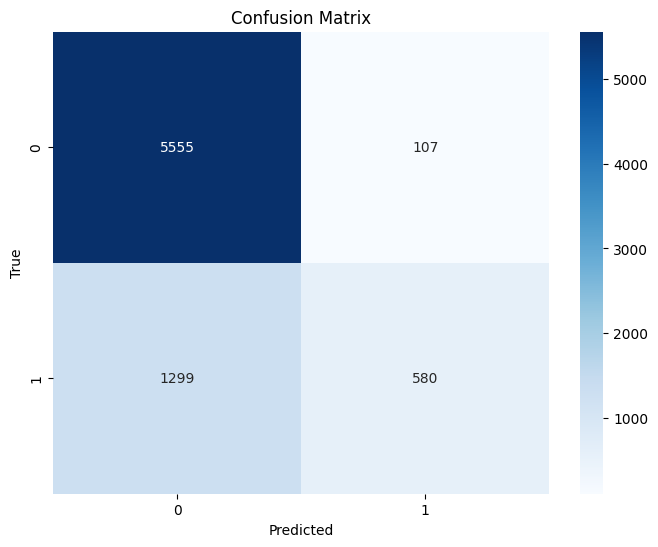

accuracy for class 0: 0.981
accuracy for class 1: 0.309

Evaluating the model on the train set...
accuracy on train set:  0.8117236196454621
precision on train set:  0.8163994458091907
recall on train set:  0.8117236196454621
f1 score on train set:  0.7764075472480552
balanced accuracy on train set:  0.6411150783673731
logistic loss on train set:  0.6646486313493974
mse on train set:  0.1882763803545378

Scorecard table:
col weights         Feature        Weight
0  featage-bin1  7.407408e-13
1  featage-bin2  1.974033e-04
2  featage-bin3 -2.361527e-04:
col weights               Feature  Weight
3  featworkclass-bin1     0.0
4  featworkclass-bin2     0.0
5  featworkclass-bin3     0.0
6  featworkclass-bin4     0.0
7  featworkclass-bin5     0.0
8  featworkclass-bin6     0.0:
col weights             Feature        Weight
9   featfnlwgt-bin1  7.407408e-13
10  featfnlwgt-bin2 -2.279943e-04
11  featfnlwgt-bin3  0.000000e+00:
col weights                    Feature        Weight
12      feateduca

In [6]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_mm_model, adult_caim_diff_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                params={'C': 0.5, 'class_weight': None})


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")  

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 7.9909491539001465 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.8268134199708261
precision:  0.8181427110564786
recall:  0.8268134199708261
f1 score:  0.8108346970182151
balanced accuracy:  0.7026117742645902
logistic loss:  0.6500756918249403
mse:  0.17318658002917384
number of features:  108
number of non-zero weights:  6
model size (non-zero weights / all weights):  0.05555555555555555


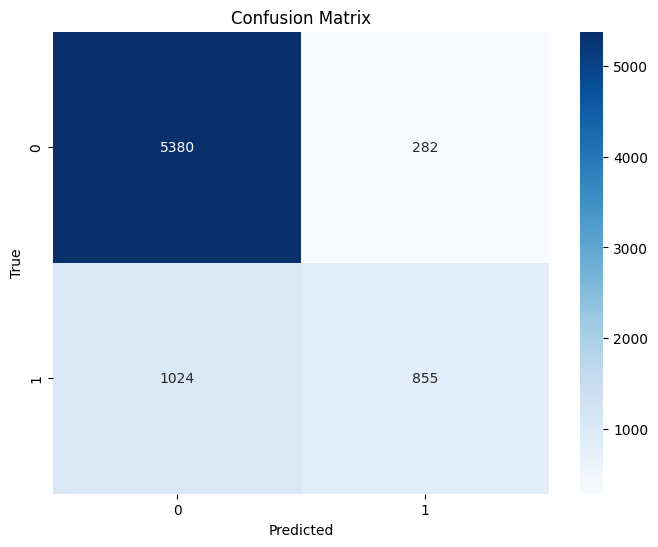

accuracy for class 0: 0.950
accuracy for class 1: 0.455

Evaluating the model on the train set...
accuracy on train set:  0.8225100570266567
precision on train set:  0.8130693440103139
recall on train set:  0.8225100570266567
f1 score on train set:  0.8051358994204175
balanced accuracy on train set:  0.6936766131822059
logistic loss on train set:  0.6518184064838356
mse on train set:  0.17748994297334336

Scorecard table:
col weights         Feature    Weight
0  featage-bin1  0.000000
1  featage-bin2  0.185338
2  featage-bin3  0.000000:
col weights               Feature  Weight
3  featworkclass-bin1     0.0
4  featworkclass-bin2     0.0
5  featworkclass-bin3     0.0
6  featworkclass-bin4     0.0
7  featworkclass-bin5     0.0
8  featworkclass-bin6     0.0:
col weights             Feature  Weight
9   featfnlwgt-bin1     0.0
10  featfnlwgt-bin2     0.0
11  featfnlwgt-bin3     0.0:
col weights                    Feature    Weight
12      feateducation-bin1  0.000000
13      feateducation-b

In [7]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_beyondl1_model, adult_caim_diff_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

Execution time: 5.550054311752319 seconds

Evaluating the model on the test set...
      True Value  Prediction
0              1           0
1              0           0
2              1           0
3              0           0
4              0           0
...          ...         ...
7536           0           0
7537           0           0
7538           0           0
7539           0           0
7540           0           0

[7541 rows x 2 columns]
accuracy:  0.8277416788224373
precision:  0.8189818814437613
recall:  0.8277416788224373
f1 score:  0.8125064421597609
balanced accuracy:  0.7058967949500032
logistic loss:  0.6493200516716946
mse:  0.17225832117756265
number of features:  108
number of non-zero weights:  18
model size (non-zero weights / all weights):  0.16666666666666666


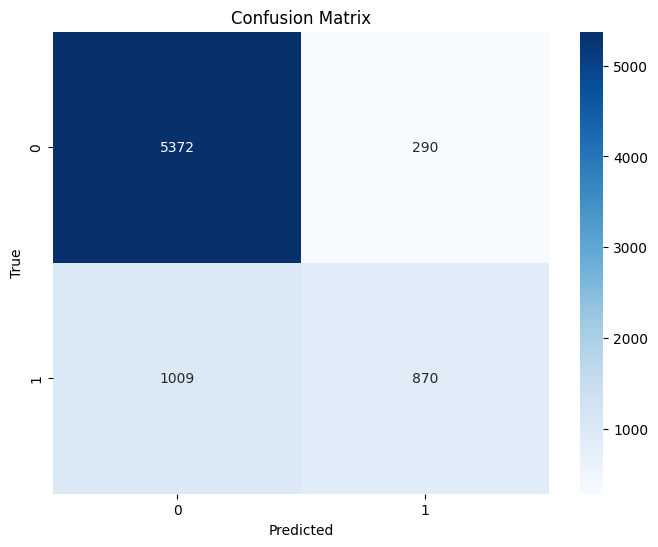

accuracy for class 0: 0.949
accuracy for class 1: 0.463

Evaluating the model on the train set...
accuracy on train set:  0.824189912028646
precision on train set:  0.8148707129070727
recall on train set:  0.824189912028646
f1 score on train set:  0.8076818305362213
balanced accuracy on train set:  0.6980023924815633
logistic loss on train set:  0.6509115581294633
mse on train set:  0.17581008797135406

Scorecard table:
        Feature    Weight
0  featage-bin1 -0.001641
1  featage-bin2  0.184542
2  featage-bin3 -0.162600
              Feature  Weight
3  featworkclass-bin1     0.0
4  featworkclass-bin2     0.0
5  featworkclass-bin3     0.0
6  featworkclass-bin4     0.0
7  featworkclass-bin5     0.0
8  featworkclass-bin6     0.0
            Feature    Weight
9   featfnlwgt-bin1 -0.001641
10  featfnlwgt-bin2  0.003575
11  featfnlwgt-bin3  0.006269
                   Feature    Weight
12      feateducation-bin1  0.000000
13      feateducation-bin2  0.000000
14      feateducation-bin3  0.0

In [5]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_diff_adaptivelasso_model, adult_caim_diff_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                params={'alpha': 1e-08})

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & 1ook

testing parameters: {'C': 1000.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7702580125152043
testing parameters: {'C': 1000.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7718937135767008
testing parameters: {'C': 100.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7767119402474709
testing parameters: {'C': 100.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7789223246430333
testing parameters: {'C': 10.0, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7892226016188676
testing parameters: {'C': 10.0, 'class_weight': None}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.7975334007454411
testing parameters: {'C': 2.5, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4
  fold  5
  mean score: 0.8008935719135758
testing para

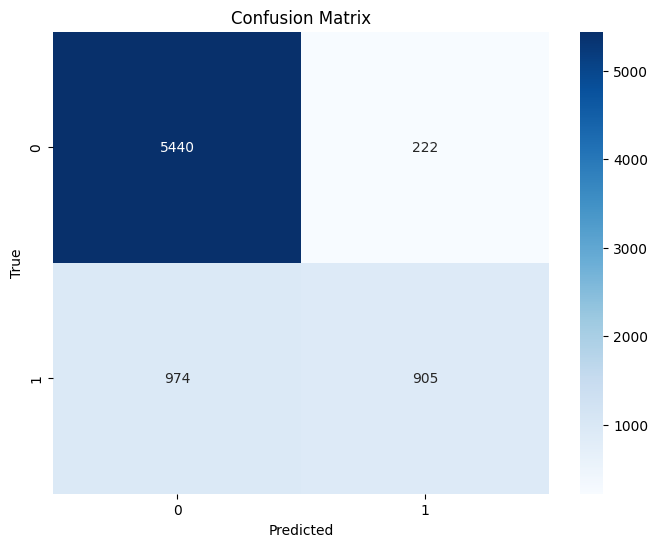

accuracy for class 0: 0.961
accuracy for class 1: 0.482

Evaluating the model on the train set...
accuracy on train set:  0.8531011007470934
precision on train set:  0.8513067527866169
recall on train set:  0.8531011007470934
f1 score on train set:  0.8396210776669017
balanced accuracy on train set:  0.7377991814734632
logistic loss on train set:  0.6451010112662638
mse on train set:  0.14689889925290658

Scorecard table:
          Feature    Weight
0    featage-bin1 -3.357940
1   featage-bin10 -1.296539
2   featage-bin11 -0.884286
3   featage-bin12 -0.624396
4   featage-bin13 -0.457636
..            ...       ...
66   featage-bin7 -2.058766
67  featage-bin70  0.000000
68  featage-bin71 -0.280036
69   featage-bin8 -1.481670
70   featage-bin9 -1.322994

[71 rows x 2 columns]
                Feature    Weight
71  featworkclass-bin-1 -0.219097
72   featworkclass-bin1  0.000000
73   featworkclass-bin2  0.000000
74   featworkclass-bin3  0.000000
75   featworkclass-bin4  0.000000
76   featwo

In [6]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_ml_model, adult_infbins_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_mm_model, adult_infbins_1ook_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

testing parameters: {'C': 0.0009765625, 'class_weight': 'balanced'}
  fold  1
  fold  2
  fold  3
  fold  4


In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_beyondl1_model, adult_infbins_1ook_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_adaptivelasso_model, adult_infbins_1ook_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

#### Inf Bins & Diff Coding

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_ml_model, adult_infbins_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_mm_model, adult_infbins_diff_mm_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_beyondl1_model, adult_infbins_diff_beyondl1_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_diff_adaptivelasso_model, adult_infbins_diff_adaptivelasso_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO')

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

scorecard.evaluate()

scorecard.show_scorecard()

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

In [ ]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", mushroom_y.mean())

In [ ]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

In [ ]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", spambase_y['Class'].mean())

In [ ]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## advertisements
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", telemarketing_y.mean())

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

num rows with nulls:  16
num observations:  683
num features:  9
target distribution:  Class
0    444
1    239
Name: count, dtype: int64


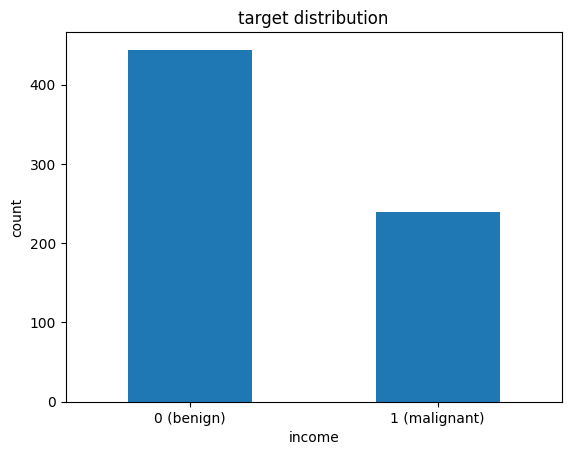

Proportion of positive class:  0.34992679355783307


In [ ]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", breast_cancer_y.mean())

In [ ]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  190.53154681139756
# 1  GLOBAL CAIM  226.87936287348333
# 2  GLOBAL CAIM  223.22969965670123
# 3  GLOBAL CAIM  194.36492804663305
# 4  GLOBAL CAIM  205.1057371690095
# 5  GLOBAL CAIM  214.91971933978692
# 6  GLOBAL CAIM  214.80568453892477
# 7  GLOBAL CAIM  204.86383745698836
# 8  GLOBAL CAIM  154.09580372609327

thresholds  {'Clump_thickness': [1.0, 6.0, 10.0], 'Uniformity_of_cell_size': [1.0, 3.0, 10.0], 'Uniformity_of_cell_shape': [1.0, 3.0, 10.0], 'Marginal_adhesion': [1.0, 3.0, 10.0], 'Single_epithelial_cell_size': [1.0, 2.0, 10.0], 'Bare_nuclei': [1.0, 3.0, 10.0], 'Bland_chromatin': [1.0, 3.0, 10.0], 'Normal_nucleoli': [1.0, 2.0, 10.0], 'Mitoses': [1.0, 2.0, 10.0]}
num of bins: 
  Clump_thickness: 4
  Uniformity_of_cell_size: 4
  Uniformity_of_cell_shape: 4
  Marginal_adhesion: 4
  Single_epithelial_cell_size: 4
  Bare_nuclei: 4
  Bland_chromatin: 4
  Normal_nucleoli: 4
  Mitoses: 4

encoding
X_disc shape:  (512, 27)
X_disc columns:  I

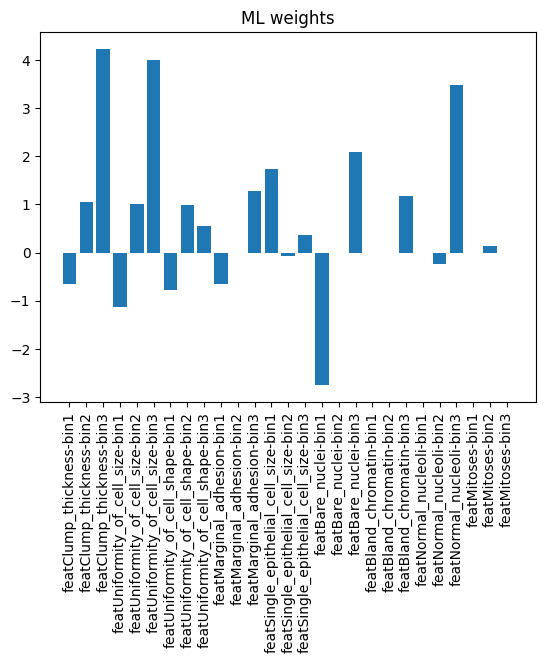

num of zero weights:  7
num of non-zero weights:  20
                                 Feature    Weight
0               featClump_thickness-bin1 -0.658042
1               featClump_thickness-bin2  1.041874
2               featClump_thickness-bin3  4.225966
3       featUniformity_of_cell_size-bin1 -1.133842
4       featUniformity_of_cell_size-bin2  1.013811
5       featUniformity_of_cell_size-bin3  3.988853
6      featUniformity_of_cell_shape-bin1 -0.779735
7      featUniformity_of_cell_shape-bin2  0.992249
8      featUniformity_of_cell_shape-bin3  0.550112
9             featMarginal_adhesion-bin1 -0.643806
11            featMarginal_adhesion-bin3  1.272319
12  featSingle_epithelial_cell_size-bin1  1.728639
13  featSingle_epithelial_cell_size-bin2 -0.074859
14  featSingle_epithelial_cell_size-bin3  0.357249
15                  featBare_nuclei-bin1 -2.746451
17                  featBare_nuclei-bin3  2.083450
20              featBland_chromatin-bin3  1.185360
22              featNormal_nu

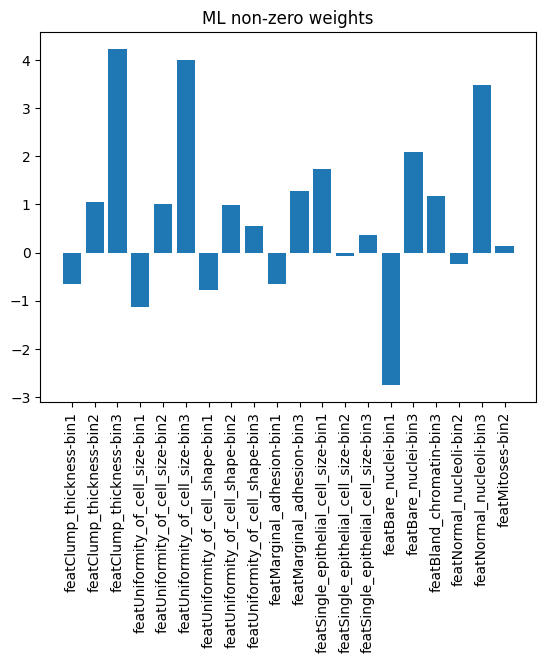


evaluate
encoding test set
X_disc shape:  (171, 27)
X_disc columns:  Index(['featClump_thickness-bin1', 'featClump_thickness-bin2',
       'featClump_thickness-bin3', 'featUniformity_of_cell_size-bin1',
       'featUniformity_of_cell_size-bin2', 'featUniformity_of_cell_size-bin3',
       'featUniformity_of_cell_shape-bin1',
       'featUniformity_of_cell_shape-bin2',
       'featUniformity_of_cell_shape-bin3', 'featMarginal_adhesion-bin1',
       'featMarginal_adhesion-bin2', 'featMarginal_adhesion-bin3',
       'featSingle_epithelial_cell_size-bin1',
       'featSingle_epithelial_cell_size-bin2',
       'featSingle_epithelial_cell_size-bin3', 'featBare_nuclei-bin1',
       'featBare_nuclei-bin2', 'featBare_nuclei-bin3',
       'featBland_chromatin-bin1', 'featBland_chromatin-bin2',
       'featBland_chromatin-bin3', 'featNormal_nucleoli-bin1',
       'featNormal_nucleoli-bin2', 'featNormal_nucleoli-bin3',
       'featMitoses-bin1', 'featMitoses-bin2', 'featMitoses-bin3'],
      dtype

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.show_scorecard()

                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -0.658042
1               Clump_thickness  [6.0, 10.0[  1.041874
2               Clump_thickness  [10.0, inf[  4.225966
3       Uniformity_of_cell_size   [1.0, 3.0[ -1.133842
4       Uniformity_of_cell_size  [3.0, 10.0[  1.013811
5       Uniformity_of_cell_size  [10.0, inf[  3.988853
6      Uniformity_of_cell_shape   [1.0, 3.0[ -0.779735
7      Uniformity_of_cell_shape  [3.0, 10.0[  0.992249
8      Uniformity_of_cell_shape  [10.0, inf[  0.550112
9             Marginal_adhesion   [1.0, 3.0[ -0.643806
10            Marginal_adhesion  [10.0, inf[  1.272319
11  Single_epithelial_cell_size   [1.0, 2.0[  1.728639
12  Single_epithelial_cell_size  [2.0, 10.0[ -0.074859
13  Single_epithelial_cell_size  [10.0, inf[  0.357249
14                  Bare_nuclei   [1.0, 3.0[ -2.746451
15                  Bare_nuclei  [10.0, inf[  2.083450
16              Bland_chromatin  [10.0, inf[  1.185360
17        

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# remove rows with nulls
tic_tac_toe_combined = pd.concat([tic_tac_toe_X, tic_tac_toe_y], axis=1)
print("num rows with nulls: ", tic_tac_toe_combined.isnull().sum().sum())
tic_tac_toe_combined = tic_tac_toe_combined.dropna().reset_index(drop=True)
tic_tac_toe_X = tic_tac_toe_combined.iloc[:, :-1]
tic_tac_toe_y = tic_tac_toe_combined.iloc[:, -1]

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", tic_tac_toe_y.mean())

In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X.loc[:, col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])